# **Library**

In [1]:
import pandas as pd
import os, time, csv, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from collections import Counter

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

# **Parameter**

In [2]:
df = pd.read_excel('./Merged_all_data.xlsx')
df['year'] = df['publish_date'].dt.year
years = [i for i in range(2003, 2025)]
fontsize={'legend':12, 'text':8, 'labels':8}
colors = ["#808080", "k", "r", 'y', 'm', 'b']
publishers = ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley']

algorithms = [
    'RL',
    'SARSA',
    'TD',
    'Q-learning',
    'DQN',
    'PG',
    'PPO',
    'A3C',
    'DDPG',
    'MARL',
    'DDQN',
    'Dyna-Q',
    'A2C'
]

methods = [
    'Data Aggregation',
    'Sleep/Wake-up',  # Added comma here
    'Collision Avoidance',
    'Multi-Hop',
    'Multi-Path',
    'CH Selection',
    'Discovery Neighbour',
    'Cluster Formation',
    'Fault Tolerance',
    'Energy Consumption',
    'Energy Balancing'
]

parameters = [
    "Number of hops", "Distance", "Residual energy", "Link strength", "Node status", 
    "Coverage", "Distance to Cluster Head (CH)", "Cluster formation", "Number of nodes", 
    "Cluster Head (CH) selection", "Packet transmission status", "Network congestion", 
    "Routing path", "Scheduling parameter", "Data traffic", "Network traffic", 
    "Transmission power control", "Data aggregation", "Latency", "Node mobility", 
    "Load balancing", "Energy consumption rate", "Transmission delay", "Node failure rate", 
    "Packet delivery ratio", "Duty cycle", "Path loss", "Channel state information", 
    "Signal-to-noise ratio (SNR)", "Interference level", "Transmission retries", 
    "Traffic priority", "Packet loss rate", "Signal strength", "Data rate", 
    "Bandwidth usage", "Routing path stability", "Node degree", "Cluster Head (CH) election frequency", 
    "Node density", "Network size", "Topology changes", "Traffic load balancing", 
    "Throughput", "Jitter", "Packet delay variation", "Authentication status", 
    "Encryption level", "Security overhead", "Memory usage", "CPU usage", "Storage capacity", 
    "Duty cycle management", "Active/sleep scheduling", "Temperature", "Humidity", 
    "Physical obstacles", "Terrain", "Node placement accuracy", "Coverage area", 
    "Redundancy level", "Load balancing efficiency", "Channel allocation", 
    "Multi-path routing capability", "Scalability", "Fairness in resource allocation", 
    "Routing overhead", "Routing latency", "Route discovery time", "Route maintenance cost", 
    "Quality of links", "Mobility support", "Energy efficiency metrics", "Reliability metrics", 
    "Adaptive algorithms", "Self-healing capability", "Fault tolerance", "Network lifetime", 
    "Convergence time", "Data redundancy", "Network synchronization", "Control overhead", 
    "Routing metric", "Routing decision accuracy", "Route stability", 
    "Hop-by-hop energy consumption", "Global energy balance", "Energy-aware routing", 
    "Threshold energy level", "Network topology diversity", "Local information availability", 
    "Geographic information", "Position information", "Location-based routing", 
    "Directionality of links", "Cross-layer optimization", "Learning rate in reinforcement learning", 
    "Exploration vs exploitation balance", "Reward function design", "Policy convergence", 
    "Neighbor node information", "Beacon interval", "Data compression rate", 
    "Energy harvesting rate", "Sleep mode duration", "Energy per bit", 
    "Data packet size", "Network throughput", "Route optimality", "Graph",
    "Energy distribution among nodes", "Link stability", "Routing table size", 
    "Data prioritization", "Channel utilization", "Synchronization accuracy", 
    "Environmental sensing accuracy", "Data freshness", "Backup route availability", 
    "Route diversity", "Packet queuing delay", "Buffer occupancy", 
    "Energy consumption per operation", "Cluster size", "Beaconing rate", 
    "Routing protocol overhead", "Data transmission frequency", "Energy consumption variance", 
    "Node collaboration level", "Topology control mechanism", "Energy harvesting efficiency", 
    "Network adaptability", "Resource utilization efficiency", "Routing path optimality", 
    "Energy redistribution mechanisms", "Dynamic routing adaptability", "Fault detection rate", 
    "Recovery time from faults", "Energy-efficient wake-up scheduling", "Data aggregation efficiency", 
    "Traffic prediction accuracy", "Routing decision latency", "Network scalability factor", 
    "Energy-aware neighbor selection", "Adaptive transmission power", 
    "Data forwarding strategy", "Energy-aware MAC protocol", "Data routing flexibility", 
    "Energy harvesting capability", "Dynamic clustering", "Energy threshold adaptation", 
    "Routing path robustness", "Energy-efficient data dissemination", "QoS-aware routing", 
    "Energy-efficient neighbor discovery"
]

def find_parameters(row=df, informations=parameters):
    found_params = []
    combined_text = ' '.join([row['abstract'], row['title'], row['keyword']]).lower()
    for param in informations:
        if param.lower() in combined_text:
            found_params.append(param)
    return found_params
    
def subcategorybar(
    X, 
    vals, 
    colors, 
    labels, 
    markers='^', 
    width=0.8, 
    major=1000, 
    minor=500, 
    bar=True, 
    plot=False, 
    spines=False, 
    rotation=45,
    fontsize=fontsize,
    show_text=False
):
    n = len(vals)
    _X = np.arange(len(X))
    fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
    for i in range(n):
        print(f"L: {labels[i]} | colors : {colors[i]} | {i} | {vals[i]}")
        if bar:
            bars = ax.bar(
                _X - width/2. + i/float(n)*width, 
                vals[i], 
                width=width/float(n), 
                align="edge",
                color=colors[i],
                label=labels[i]
            )   
            if show_text:
                for bar in bars:
                    yval = bar.get_height()
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,  # X position
                        yval + 0.1,  # Y position (slightly above the bar)
                        round(yval, 2),  # The value of the bar, rounded to 2 decimals
                        ha='center',  # Horizontal alignment
                        va='bottom',  # Vertical alignment
                        fontsize=fontsize['text']  # Font size
                    )
        if plot:
            print(markers)
            ax.plot(_X , vals[i], marker = markers[i], lw=0.45, color=colors[i], label=labels[i], mfc='none', markersize=5)
            plt.grid()

    plt.xticks(_X, X)
    
    ax.yaxis.set_minor_locator(MultipleLocator(minor))
    ax.set_xticks(range(0, len(X)), X, rotation=rotation)
    ax.yaxis.set_major_locator(MultipleLocator(major))
    ax.spines[['right', 'top']].set_visible(spines)

    plt.legend(fontsize=fontsize['legend'])



# **Before PRISMA**

### Publication over the year 

#### Publication over the year (2003-2024)

L: Springer | colors : #808080 | 0 | [0, 2, 2, 6, 4, 4, 4, 10, 7, 15, 26, 17, 15, 28, 33, 33, 39, 67, 124, 156, 171, 191]
L: Sciencedirect | colors : k | 1 | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 10, 10]
L: Scopus | colors : r | 2 | [0, 0, 0, 5, 3, 3, 3, 2, 4, 8, 4, 4, 4, 2, 6, 9, 19, 9, 26, 33, 41, 38]
L: IEEE | colors : y | 3 | [0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 3, 1, 2, 1, 1, 5, 2, 8, 4, 7, 9]
L: ACM | colors : m | 4 | [0, 1, 1, 4, 9, 13, 14, 13, 7, 20, 15, 16, 34, 23, 24, 24, 44, 48, 57, 135, 131, 97]
L: Wiley | colors : b | 5 | [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 4, 5, 9, 11, 12, 21, 24, 62, 33, 26]


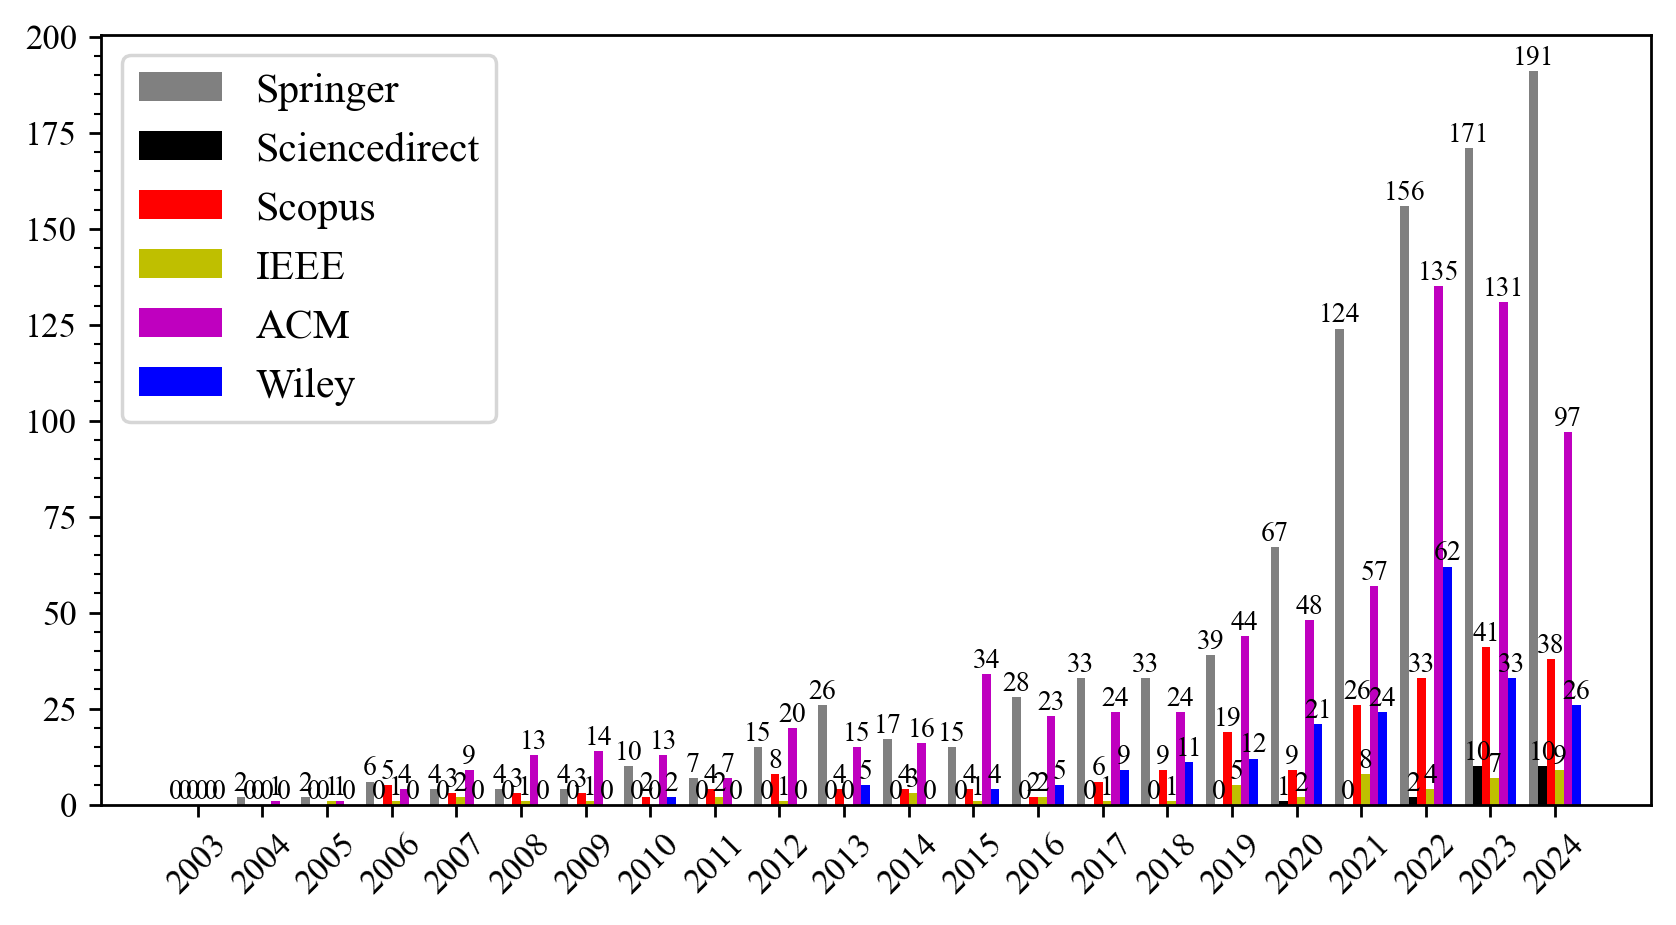

In [3]:
'''
df = {
    2004 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    2005 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    2024 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''
 
data_publication_over_year = {}
for publisher in df.publisher.unique():
    data_publication_over_year[publisher] = []
    for year in years:
        temp = df.loc[
            (df['year'] == year) & (df['publisher'] == publisher)]['title'].count()
 
        data_publication_over_year[publisher].append(temp)

subcategorybar(
    years, 
    [data_publication_over_year[publisher] for publisher in data_publication_over_year.keys()], 
    colors, 
    publishers,
    width=0.8, 
    major=25, 
    minor=5, 
    bar=True, 
    spines=True,
    show_text=True
)

#### Normalized publication over the year (2003-2024)

L: Springer | colors : #808080 | 0 | [0.0, 0.0020964360587002098, 0.0020964360587002098, 0.006289308176100629, 0.0041928721174004195, 0.0041928721174004195, 0.0041928721174004195, 0.010482180293501049, 0.007337526205450734, 0.015723270440251572, 0.027253668763102725, 0.01781970649895178, 0.015723270440251572, 0.029350104821802937, 0.03459119496855346, 0.03459119496855346, 0.040880503144654086, 0.07023060796645703, 0.129979035639413, 0.16352201257861634, 0.1792452830188679, 0.20020964360587]
L: Sciencedirect | colors : k | 1 | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043478260869565216, 0.0, 0.08695652173913043, 0.43478260869565216, 0.43478260869565216]
L: Scopus | colors : r | 2 | [0.0, 0.0, 0.0, 0.02242152466367713, 0.013452914798206279, 0.013452914798206279, 0.013452914798206279, 0.008968609865470852, 0.017937219730941704, 0.03587443946188341, 0.017937219730941704, 0.017937219730941704, 0.017937219730941704, 0.008968609865470852, 0.02690

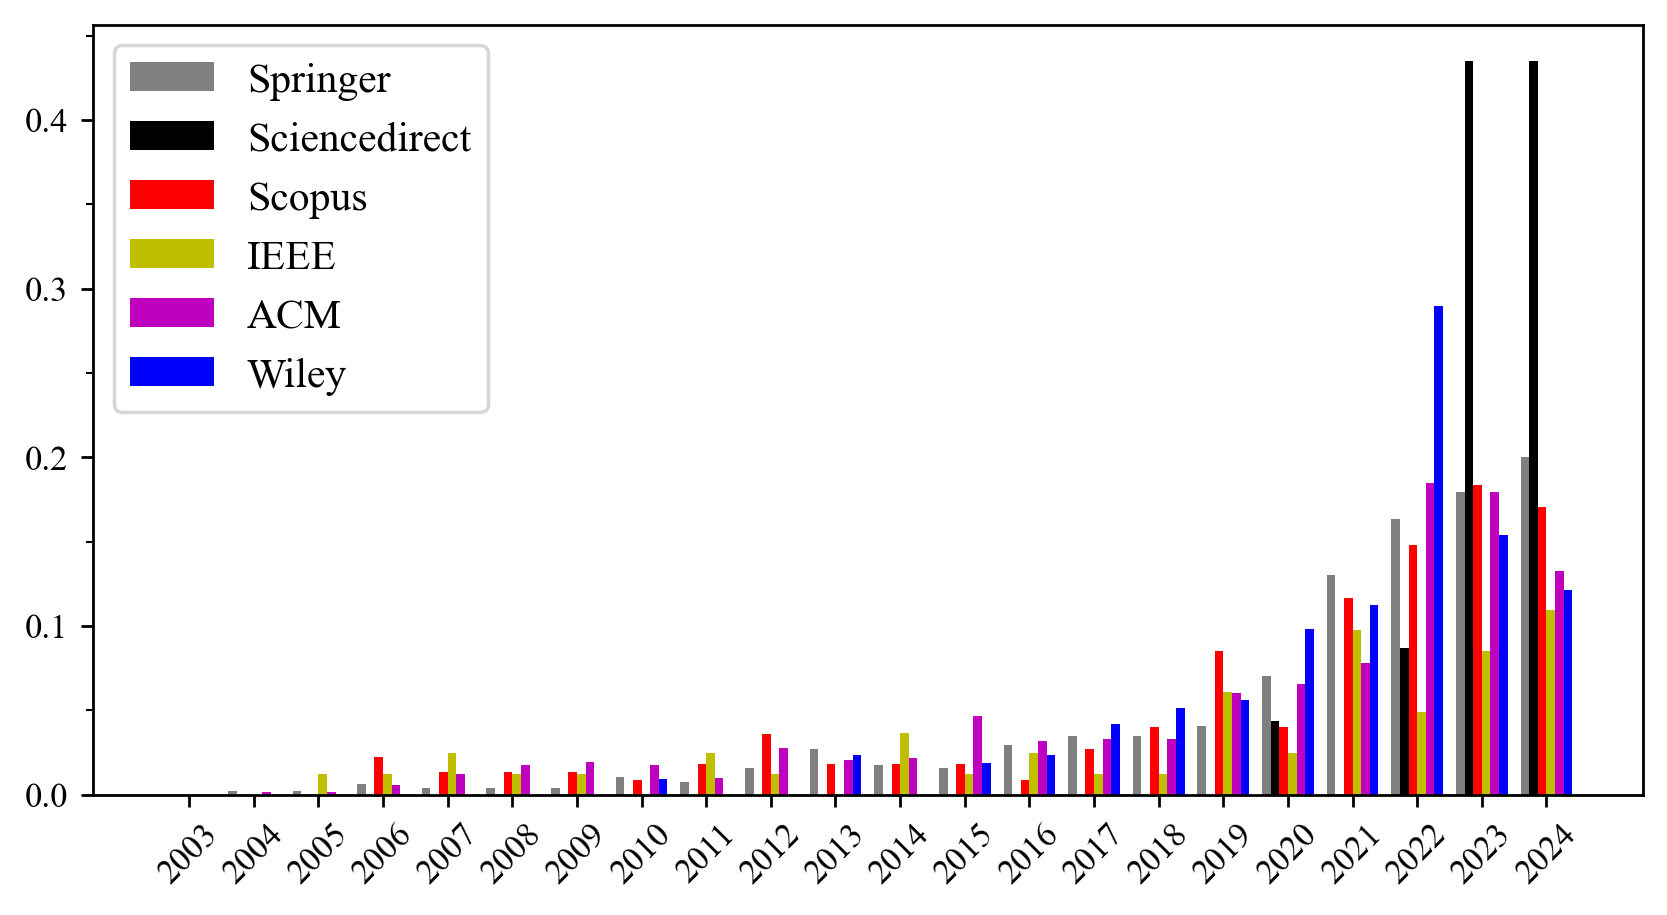

In [4]:

'''
df = {
    2004 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    2005 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    2024 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''
 
data_publication_over_year = {}
for publisher in df.publisher.unique():
    data_publication_over_year[publisher] = []
    for year in years:
        temp = df.loc[
            (df['year'] == year) & (df['publisher'] == publisher)]['title'].count()
        temp2 = len(df.loc[df['publisher'] == publisher].index)
        temp = temp/temp2

        data_publication_over_year[publisher].append(temp)

subcategorybar(
    years, 
    [data_publication_over_year[publisher] for publisher in data_publication_over_year.keys()], 
    colors, 
    publishers,
    width=0.8, 
    major=0.1, 
    minor=0.05, 
    bar=True, 
    spines=True
)

#### Publication over the year (2019-2024)

L: Springer | colors : #808080 | 0 | [39, 67, 124, 156, 171, 191]
L: Sciencedirect | colors : k | 1 | [0, 1, 0, 2, 10, 10]
L: Scopus | colors : r | 2 | [19, 9, 26, 33, 41, 38]
L: IEEE | colors : y | 3 | [5, 2, 8, 4, 7, 9]
L: ACM | colors : m | 4 | [44, 48, 57, 135, 131, 97]
L: Wiley | colors : b | 5 | [12, 21, 24, 62, 33, 26]


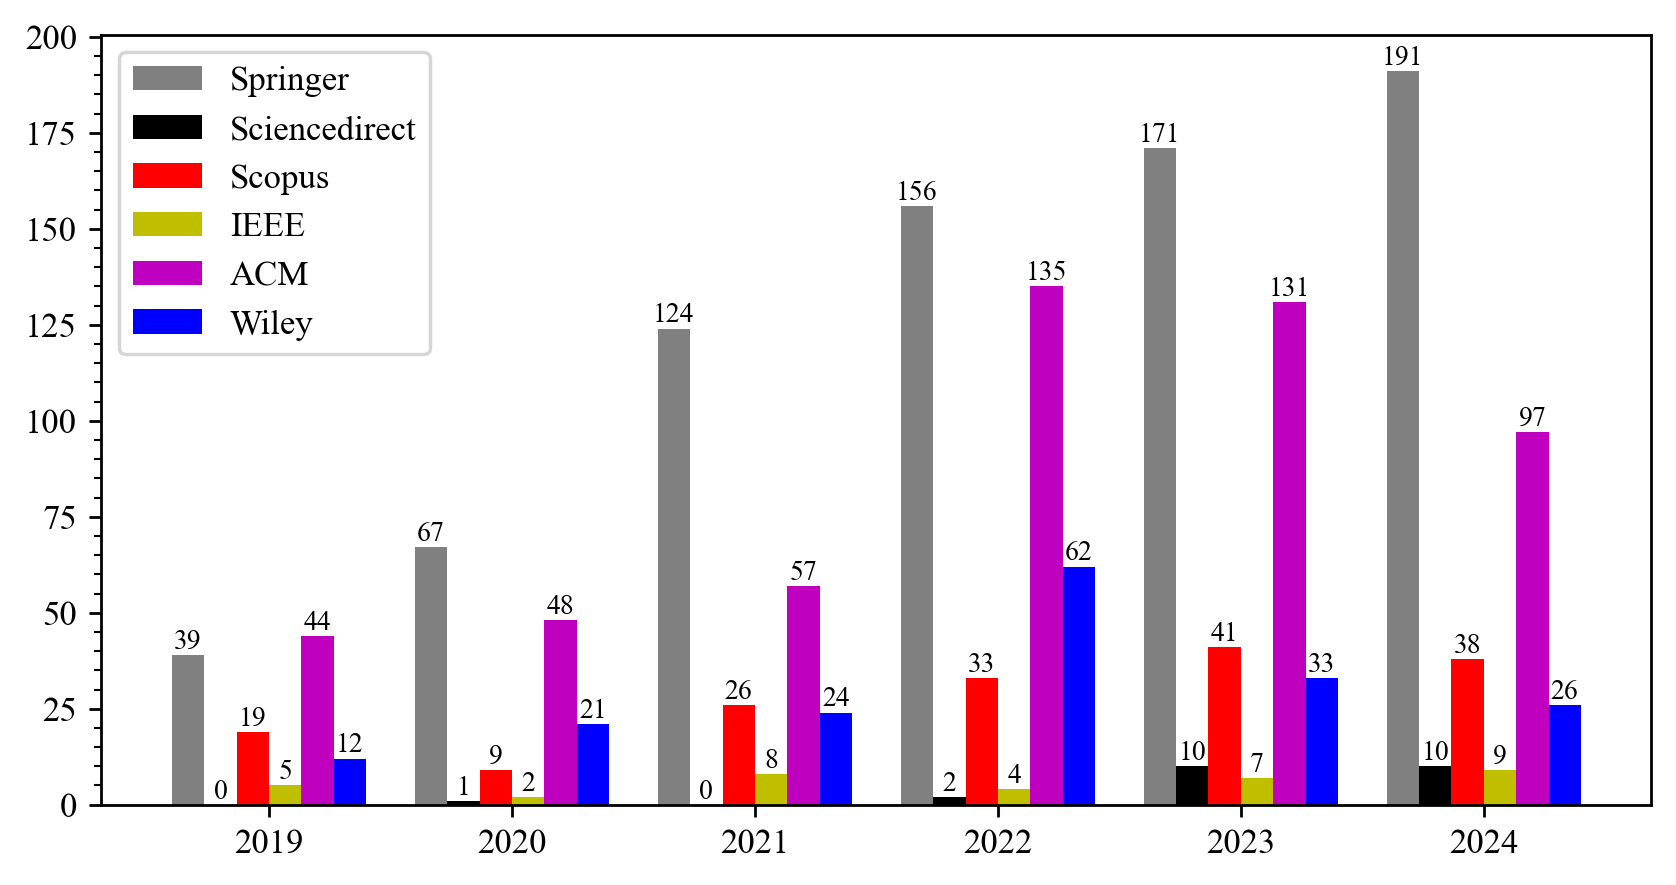

In [5]:
years = [i for i in range(2019, 2025)]
'''
df = {
    2004 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    2005 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    2024 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''
 
data_publication_over_year = {}
for publisher in df.publisher.unique():
    data_publication_over_year[publisher] = []
    for year in years:
        temp = df.loc[
            (df['year'] == year) & (df['publisher'] == publisher)]['title'].count()

        data_publication_over_year[publisher].append(temp)

fontsize['legend'] = 10
subcategorybar(
    years, 
    [data_publication_over_year[publisher] for publisher in data_publication_over_year.keys()], 
    colors, 
    publishers,
    width=0.8, 
    major=25, 
    minor=5, 
    bar=True, 
    spines=True,
    show_text=True,
    fontsize=fontsize,
    rotation=0

)

#### Normalized publication over the year (2019-2024)

L: Springer | colors : #808080 | 0 | [0.040880503144654086, 0.07023060796645703, 0.129979035639413, 0.16352201257861634, 0.1792452830188679, 0.20020964360587]
L: Sciencedirect | colors : k | 1 | [0.0, 0.043478260869565216, 0.0, 0.08695652173913043, 0.43478260869565216, 0.43478260869565216]
L: Scopus | colors : r | 2 | [0.08520179372197309, 0.04035874439461883, 0.11659192825112108, 0.14798206278026907, 0.18385650224215247, 0.17040358744394618]
L: IEEE | colors : y | 3 | [0.06097560975609756, 0.024390243902439025, 0.0975609756097561, 0.04878048780487805, 0.08536585365853659, 0.10975609756097561]
L: ACM | colors : m | 4 | [0.06027397260273973, 0.06575342465753424, 0.07808219178082192, 0.18493150684931506, 0.17945205479452056, 0.13287671232876713]
L: Wiley | colors : b | 5 | [0.056074766355140186, 0.09813084112149532, 0.11214953271028037, 0.2897196261682243, 0.1542056074766355, 0.12149532710280374]


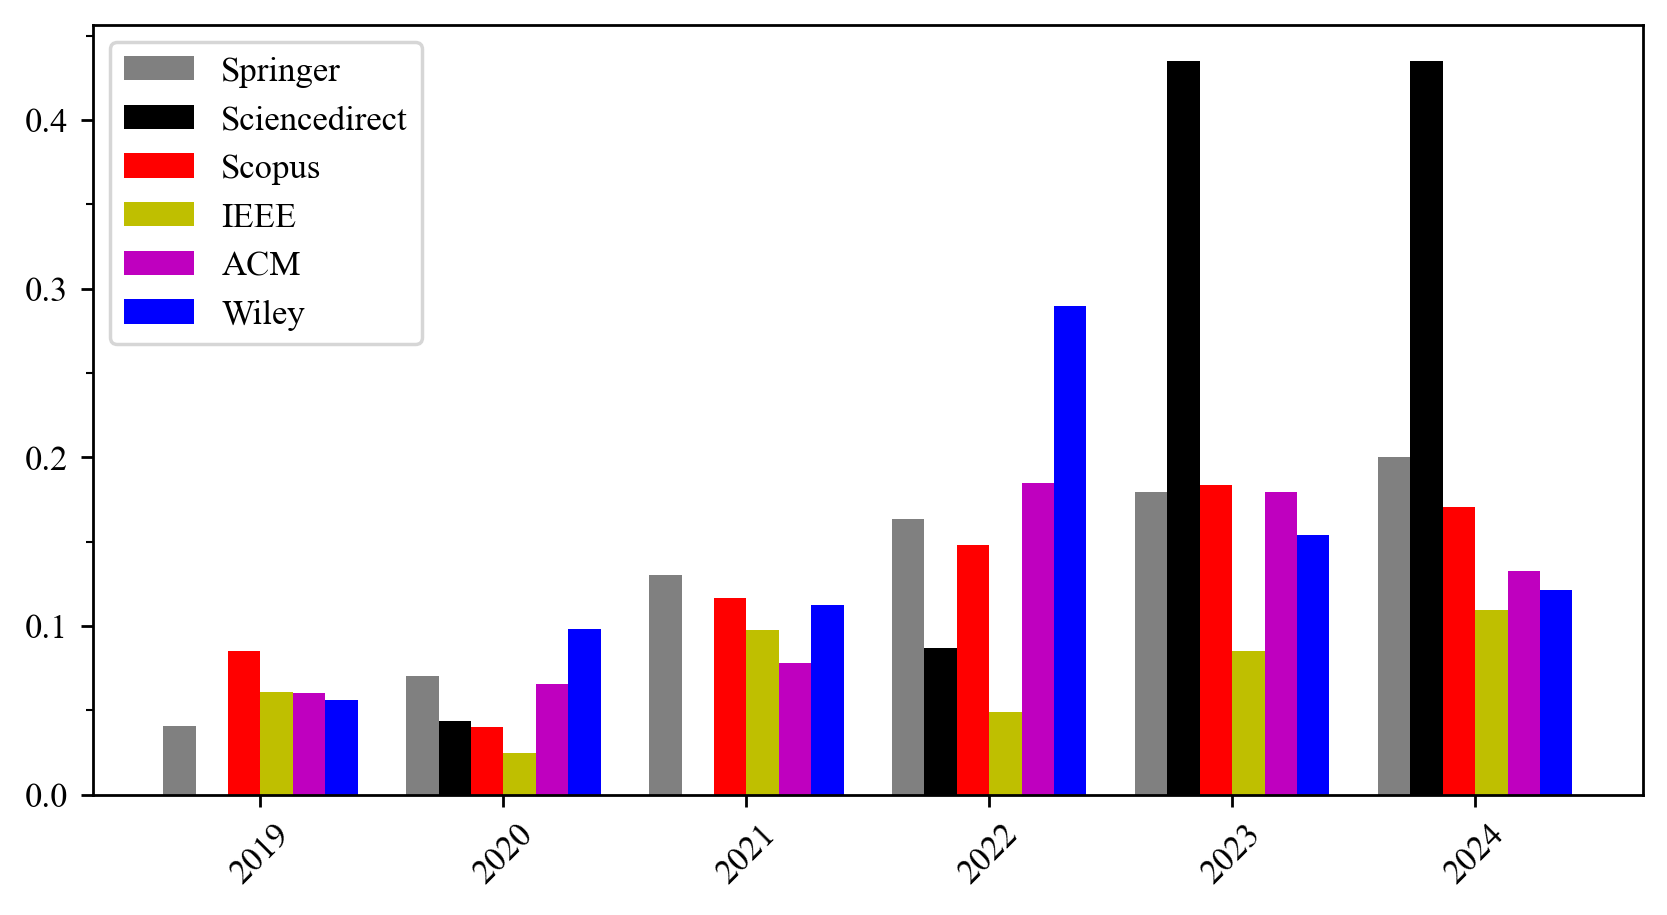

In [6]:
years = [i for i in range(2019, 2025)]
'''
df = {
    2004 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    2005 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    2024 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''

data_publication_over_year = {}
for publisher in df.publisher.unique():
    data_publication_over_year[publisher] = []
    for year in years:
        temp = df.loc[
            (df['year'] == year) & (df['publisher'] == publisher)]['title'].count()
        temp2 = len(df.loc[df['publisher'] == publisher].index)
        temp = temp/temp2

        data_publication_over_year[publisher].append(temp)

subcategorybar(
    years, 
    [data_publication_over_year[publisher] for publisher in data_publication_over_year.keys()], 
    colors, 
    publishers,
    width=0.8, 
    major=0.1, 
    minor=0.05, 
    bar=True, 
    spines=True,
    fontsize=fontsize
)

### Article types

L: Springer | colors : red | 0 | [569, 226, 159, 0, 0]
L: Scopus | colors : blue | 1 | [0, 3, 0, 0, 0]
L: Sciencedirect | colors : green | 2 | [120, 9, 91, 0, 0]
L: IEEE | colors : orange | 3 | [26, 4, 52, 0, 0]
L: ACM | colors : purple | 4 | [506, 218, 0, 4, 0]
L: Wiley | colors : brown | 5 | [142, 60, 0, 0, 3]


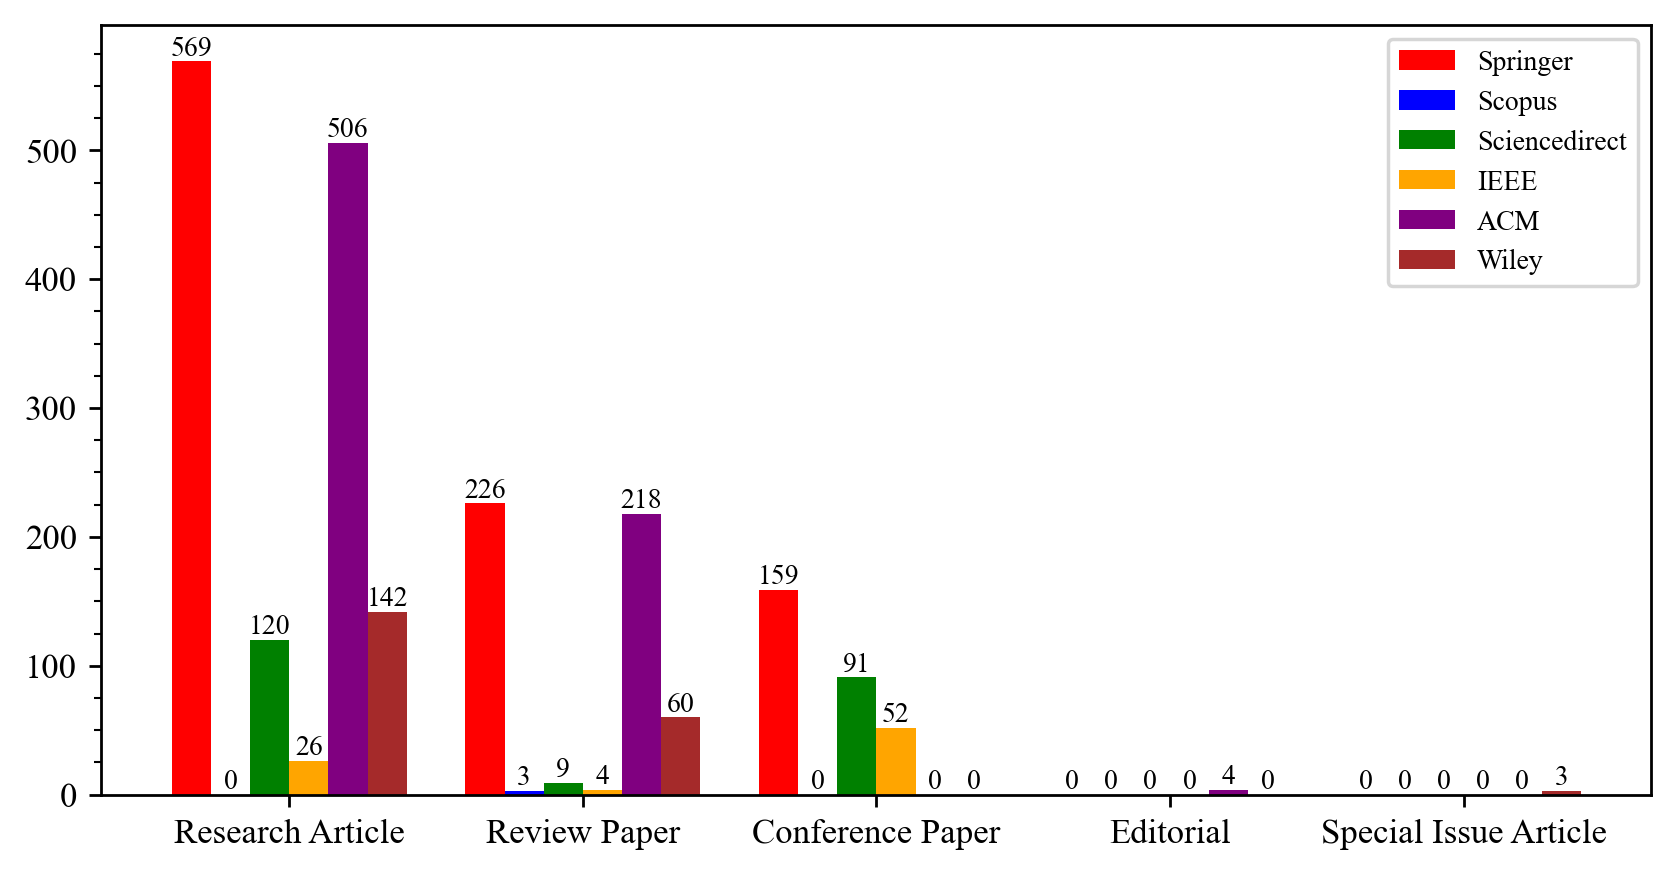

In [7]:
# Generate article type counts for each publisher
article_types = df.groupby('article_type').count()['title'].sort_values(ascending=False)
article_types = article_types.index[:5]

publishers = df['publisher'].unique()        # Use unique publishers from df
data_article_type_across_publishers = {}

# Iterate through each publisher and each article type
for publisher in publishers:
    publisher_counts = []
    for article_type in article_types:
        # Count the number of titles for each combination of article_type and publisher
        count = df.loc[(df['article_type'] == article_type) & (df['publisher'] == publisher), 'title'].count()
        publisher_counts.append(count)
    
    # Store the counts for the current publisher
    data_article_type_across_publishers[publisher] = publisher_counts


vals = [data_article_type_across_publishers[publisher] for publisher in publishers]  # Values for all publishers
fontsize['legend'] = 8
publishers = ['Springer', 'Scopus', 'Sciencedirect', 'IEEE', 'ACM', 'Wiley']
# Plot using subcategorybar function
subcategorybar(
    article_types,    # X-axis labels (article types)
    vals,             # Y-axis values (counts)
    colors=['red', 'blue', 'green', 'orange', 'purple', 'brown'],  # Colors for each publisher
    labels=publishers,  # Publisher names as labels
    width=0.8,        # Bar width
    major=100,         # Major tick interval
    minor=25,          # Minor tick interval
    bar=True,         # Plot bars
    spines=True,       # Show axis spines,
    show_text=True,
    fontsize=fontsize,
    rotation=0
)


### Review articles

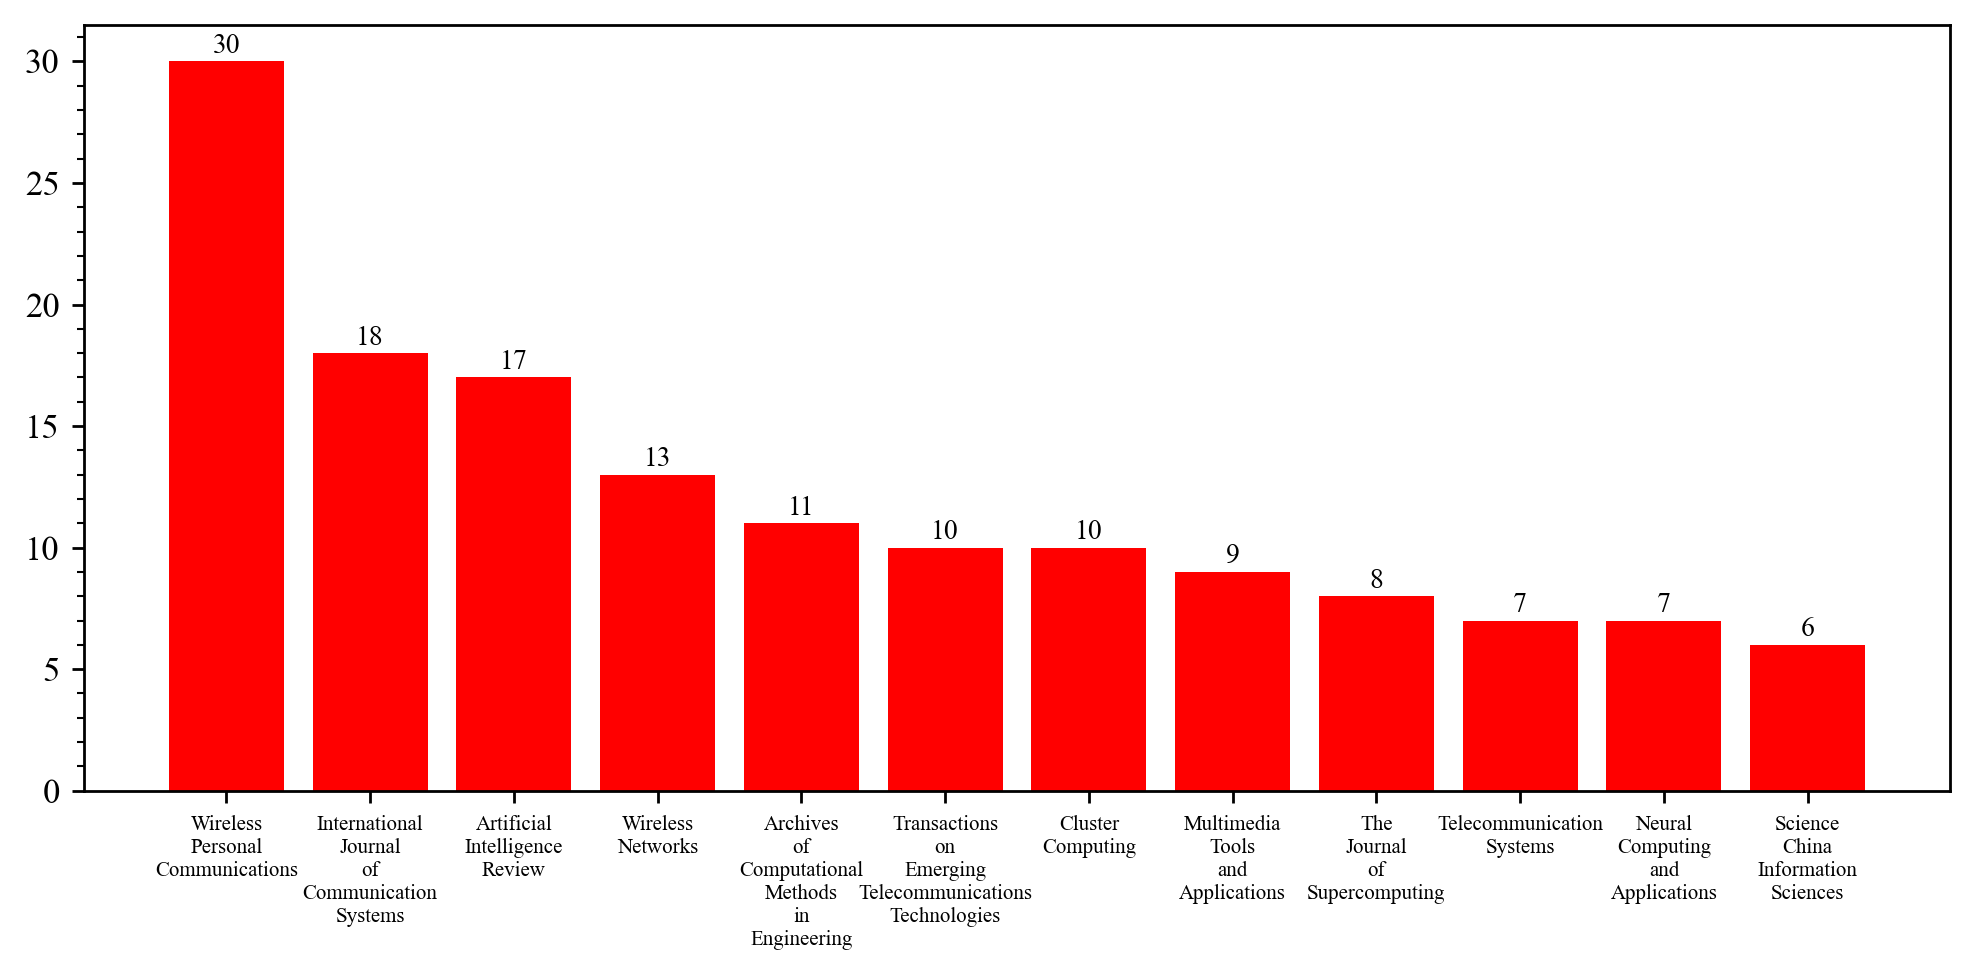

In [8]:
# Generate article type counts for each publisher
df = pd.read_excel('./Merged_all_data.xlsx')
review_article = df.loc[df.article_type == 'Review Paper']
data = review_article.groupby('publication_title').count()['title'].sort_values(ascending=False)
N_PUBLICATION_TITLE = 12
X = data.to_list()[:N_PUBLICATION_TITLE]
Y = data.index[:N_PUBLICATION_TITLE]


# Prepare X-axis values
_X = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    X, 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )

labels = [i.replace(' ', '\n') for i in Y]
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.spines[['right', 'top']].set_visible(True)

# ax.set_ylim([0,15])
# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [9]:
[label.replace('\n', ' ') for label in labels]

['Wireless Personal Communications',
 'International Journal of Communication Systems',
 'Artificial Intelligence Review',
 'Wireless Networks',
 'Archives of Computational Methods in Engineering',
 'Transactions on Emerging Telecommunications Technologies',
 'Cluster Computing',
 'Multimedia Tools and Applications',
 'The Journal of Supercomputing',
 'Telecommunication Systems',
 'Neural Computing and Applications',
 'Science China Information Sciences']

### Research Article

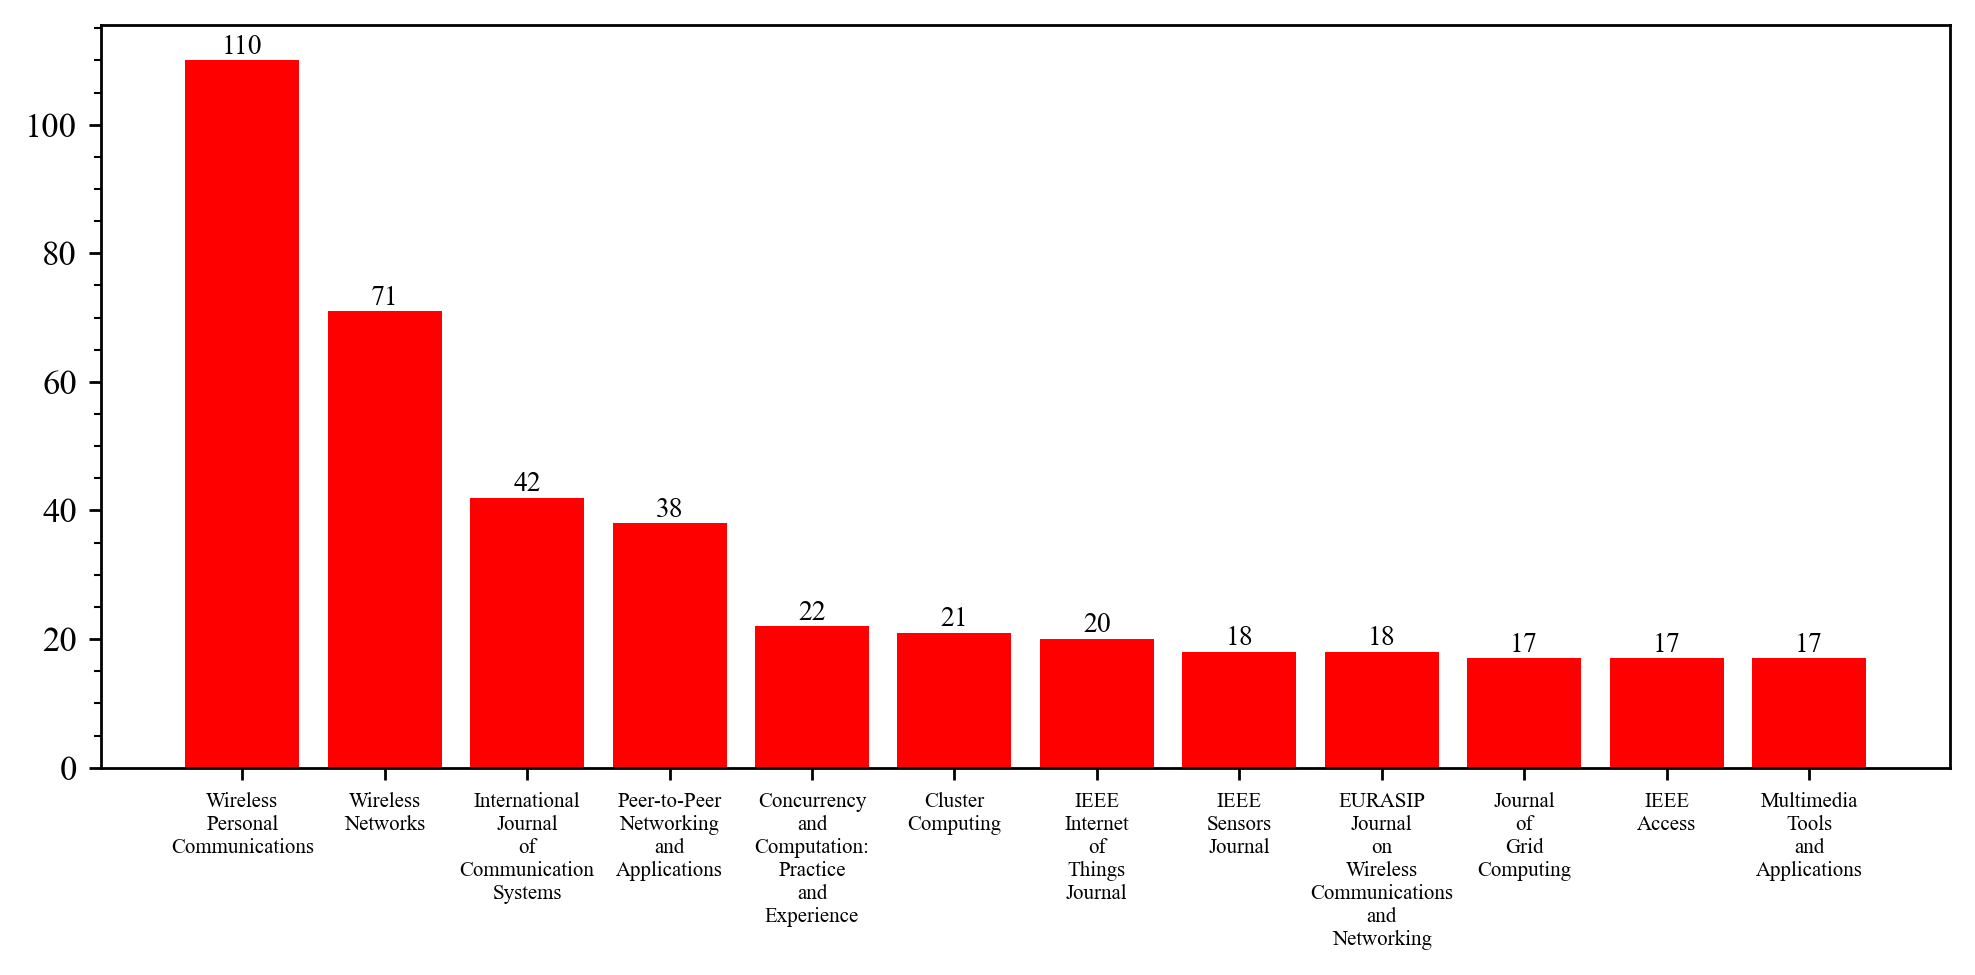

In [10]:
# Generate article type counts for each publisher
df = pd.read_excel('./Merged_all_data.xlsx')
review_article = df.loc[df.article_type == 'Research Article']
data = review_article.groupby('publication_title').count()['title'].sort_values(ascending=False)
N_PUBLICATION_TITLE = 12
X = data.to_list()[:N_PUBLICATION_TITLE]
Y = data.index[:N_PUBLICATION_TITLE]


# Prepare X-axis values
_X = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    X, 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )

labels = [i.replace(' ', '\n') for i in Y]
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.spines[['right', 'top']].set_visible(True)

# ax.set_ylim([0,15])
# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Publication Title with the Highest number of Citation

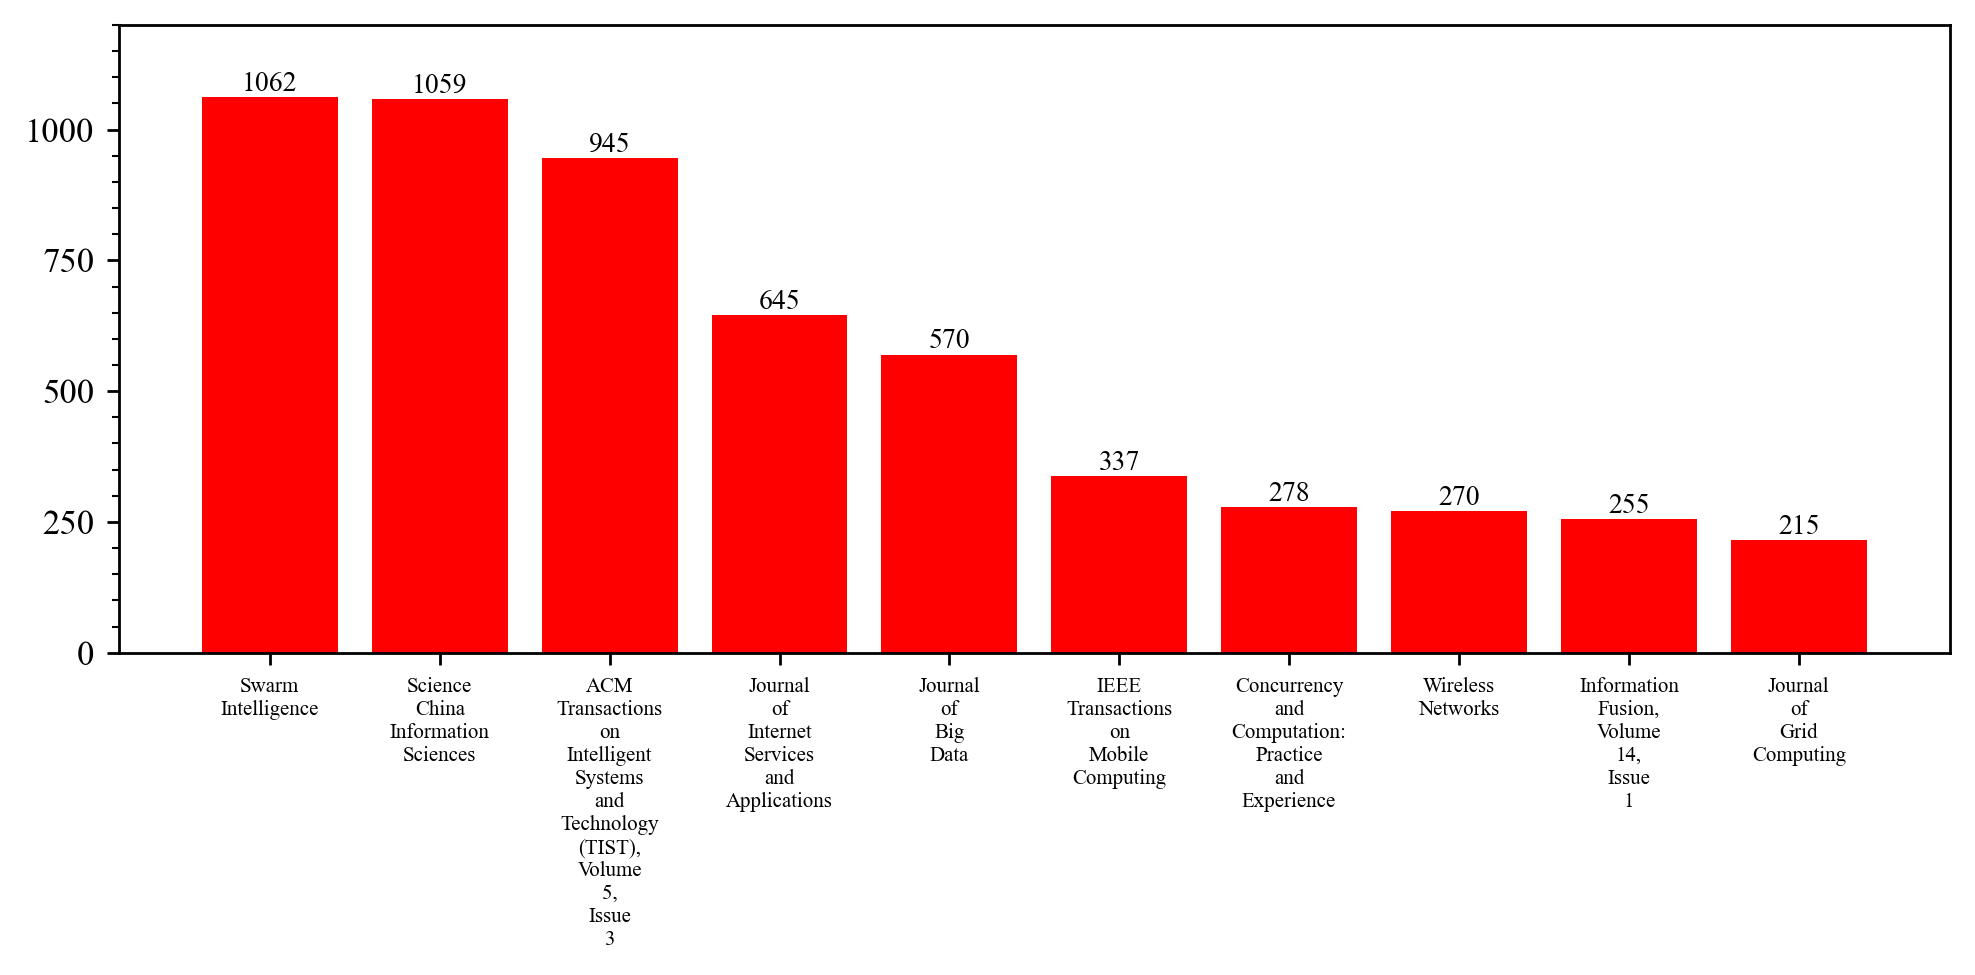

In [11]:
df_publication_title_over_number_of_citation = df.drop(columns=['title', 'link', 'article_type', 
       'keyword', 'abstract', 'publish_date', 'authors',
       'affiliations', 'number_of_affiliations', 'countries',
       'number_of_countries', 'number_of_found_property_group',
       'number_of_found_properties'])
df_publication_title_over_number_of_citation = df_publication_title_over_number_of_citation.groupby(['publication_title', 'number_of_citation']).sum().sort_values(ascending=False, by='number_of_citation')

N_PUBLICATION_TITLE = 10
Y = df_publication_title_over_number_of_citation.index.get_level_values('publication_title').to_list()[:N_PUBLICATION_TITLE]
X = df_publication_title_over_number_of_citation.index.get_level_values('number_of_citation').to_list()[:N_PUBLICATION_TITLE]


# Prepare X-axis values
_X = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    X, 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )

labels = [i.replace(' ', '\n') for i in Y]
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_major_locator(MultipleLocator(250))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.spines[['right', 'top']].set_visible(True)

ax.set_ylim([0, 1200])
# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# **After PRISMA**

Inclussion:
1. Year > 2019
2. Not duplicated
3. Paper is not review or survey

In [12]:


df = pd.read_excel('./Merged_all_data.xlsx')
df['year'] = df['publish_date'].dt.year

relevant_articles = df.copy()
n_collected_paper = len(relevant_articles)
print(f'\nCollected paper: {n_collected_paper} | {len(relevant_articles)}')


n_before_2019 = len(relevant_articles[relevant_articles['year'] < 2019])
articles_before_2019 = relevant_articles[relevant_articles['year'] < 2019].copy()
print(f'Articles before 2019: {n_before_2019} | {len(relevant_articles)}')

relevant_articles = relevant_articles[relevant_articles['year'] >= 2019]
n_after_2019 = len(relevant_articles)
print(f'Articles after 2019: {n_after_2019} | {len(relevant_articles)}')

relevant_articles['total_properties'] = relevant_articles['number_of_found_property_group'] + relevant_articles['number_of_found_properties']
relevant_articles['total_properties'] = relevant_articles['number_of_found_property_group'] + relevant_articles['number_of_found_properties']
n_article_eligible_properties = len(relevant_articles[relevant_articles['total_properties'] < 4])
relevant_articles = relevant_articles[relevant_articles['total_properties'] >= 4]
print(f'Articles eligible properties: {n_article_eligible_properties} | {len(relevant_articles)}')
df = relevant_articles.copy().reset_index(drop=True)


# print(f'''
# Collected paper: {n_collected_paper},
# Duplicated: {n_duplicate_article},
# Articles before 2019: {n_before_2019},
# Articles eligible properties: {n_article_eligible_properties},
# Relevant articles: {len(relevant_articles)}
# ''')


Collected paper: 2226 | 2226
Articles before 2019: 534 | 2226
Articles after 2019: 1662 | 1662
Articles eligible properties: 1469 | 193


#### Number of Articles

Invalid years: Sciencedirect
Incomplete article: springer
Incomplete article: Sciencedirect
Incomplete article: Scopus
Incomplete article: ieee
{'Invalid years': [206, 0, 57, 17, 218, 36], 'Duplicated': [5, 207, 39, 149, 323, 218], 'Relevant articles': [67, 5, 62, 7, 38, 14], 'Incomplete article': [0, 0, 0, 0, 129, 476]}
L: Invalid years | colors : #808080 | 0 | [206, 0, 57, 17, 218, 36]
L: Duplicated | colors : k | 1 | [5, 207, 39, 149, 323, 218]
L: Relevant articles | colors : r | 2 | [67, 5, 62, 7, 38, 14]
L: Incomplete article | colors : y | 3 | [0, 0, 0, 0, 129, 476]


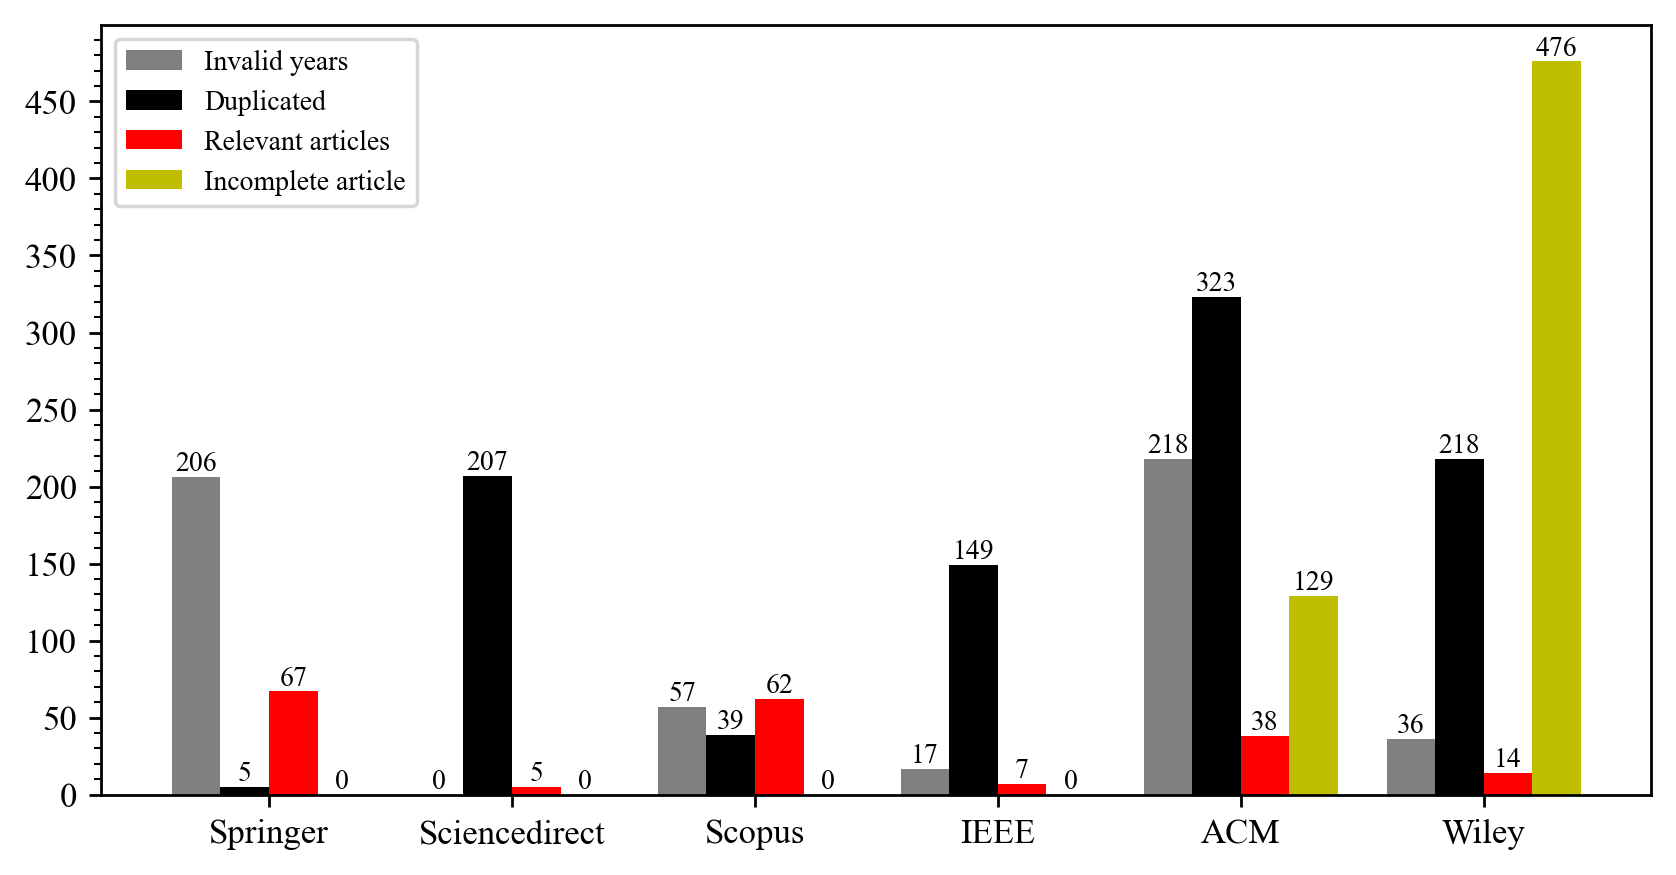

In [13]:
'''
df = {
    'Invalid years' : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    'Duplicated' : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    'Incomplete article' : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''

# Initialize the categories and publishers
publishers = ['springer', 'elsevier', 'ieee', 'acm', 'wiley']
inclussion_categories = ['Invalid years', 'Duplicated', 'Relevant articles', 'Incomplete article']
df_number_of_articles = {}

# Load the data from Excel
duplicate_groups = pd.read_excel('duplicate_groups.xlsx')
incomplete_articles = pd.read_excel('incomplete_articles.xlsx')
publishers = ['springer', 'Sciencedirect', 'Scopus', 'ieee', 'acm', 'wiley']

# Loop over each category and fill df_number_of_articles
for category in inclussion_categories:
    df_number_of_articles[category] = []  # Initialize list for each category
    
    for publisher in publishers:
        if category == 'Invalid years':
            try:
                df_number_of_articles[category].append(
                    articles_before_2019.groupby('publisher').count()['title'][publisher]
                )
            except:
                print(f'Invalid years: {publisher}')
                df_number_of_articles[category].append(0)
        
        elif category == 'Duplicated':
            # Count duplicated articles per publisher
            try:
                df_number_of_articles[category].append(
                    duplicate_groups.groupby('publisher').count()['title'][publisher]
                )
            except:
                print(f'Duplicated: {publisher}')
                df_number_of_articles[category].append(0)
        
        elif category == 'Relevant articles':
            try:
                df_number_of_articles[category].append(
                    relevant_articles.groupby('publisher').count()['title'][publisher]
                )
            except:
                print(f'Relevant articles: {publisher}')
                df_number_of_articles[category].append(0)
        
        elif category == 'Incomplete article':
            try:
                df_number_of_articles[category].append(
                    incomplete_articles.groupby('publisher').count()['title'][publisher]
                )
            except:
                print(f'Incomplete article: {publisher}')
                df_number_of_articles[category].append(0)

# Now df_number_of_articles is structured with counts for each category and publisher

# Final dictionary result
print(df_number_of_articles)

publishers = ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley']
inclussion_categories = ['Invalid years', 'Duplicated', 'Relevant articles', 'Incomplete article']
subcategorybar(
    publishers, 
    [df_number_of_articles[publisher] for publisher in df_number_of_articles.keys()], 
    colors, 
    inclussion_categories,
    width=0.8, 
    major=50, 
    minor=10, 
    bar=True, 
    spines=True,
    rotation=0,
    show_text=True
)

#### Article types

L: Springer | colors : red | 0 | [46, 18, 3, 0, 0]
L: Scopus | colors : blue | 1 | [0, 0, 0, 0, 0]
L: Sciencedirect | colors : green | 2 | [37, 25, 0, 0, 0]
L: IEEE | colors : orange | 3 | [0, 7, 0, 0, 0]
L: ACM | colors : purple | 4 | [32, 0, 6, 0, 0]
L: Wiley | colors : brown | 5 | [11, 0, 1, 1, 0]


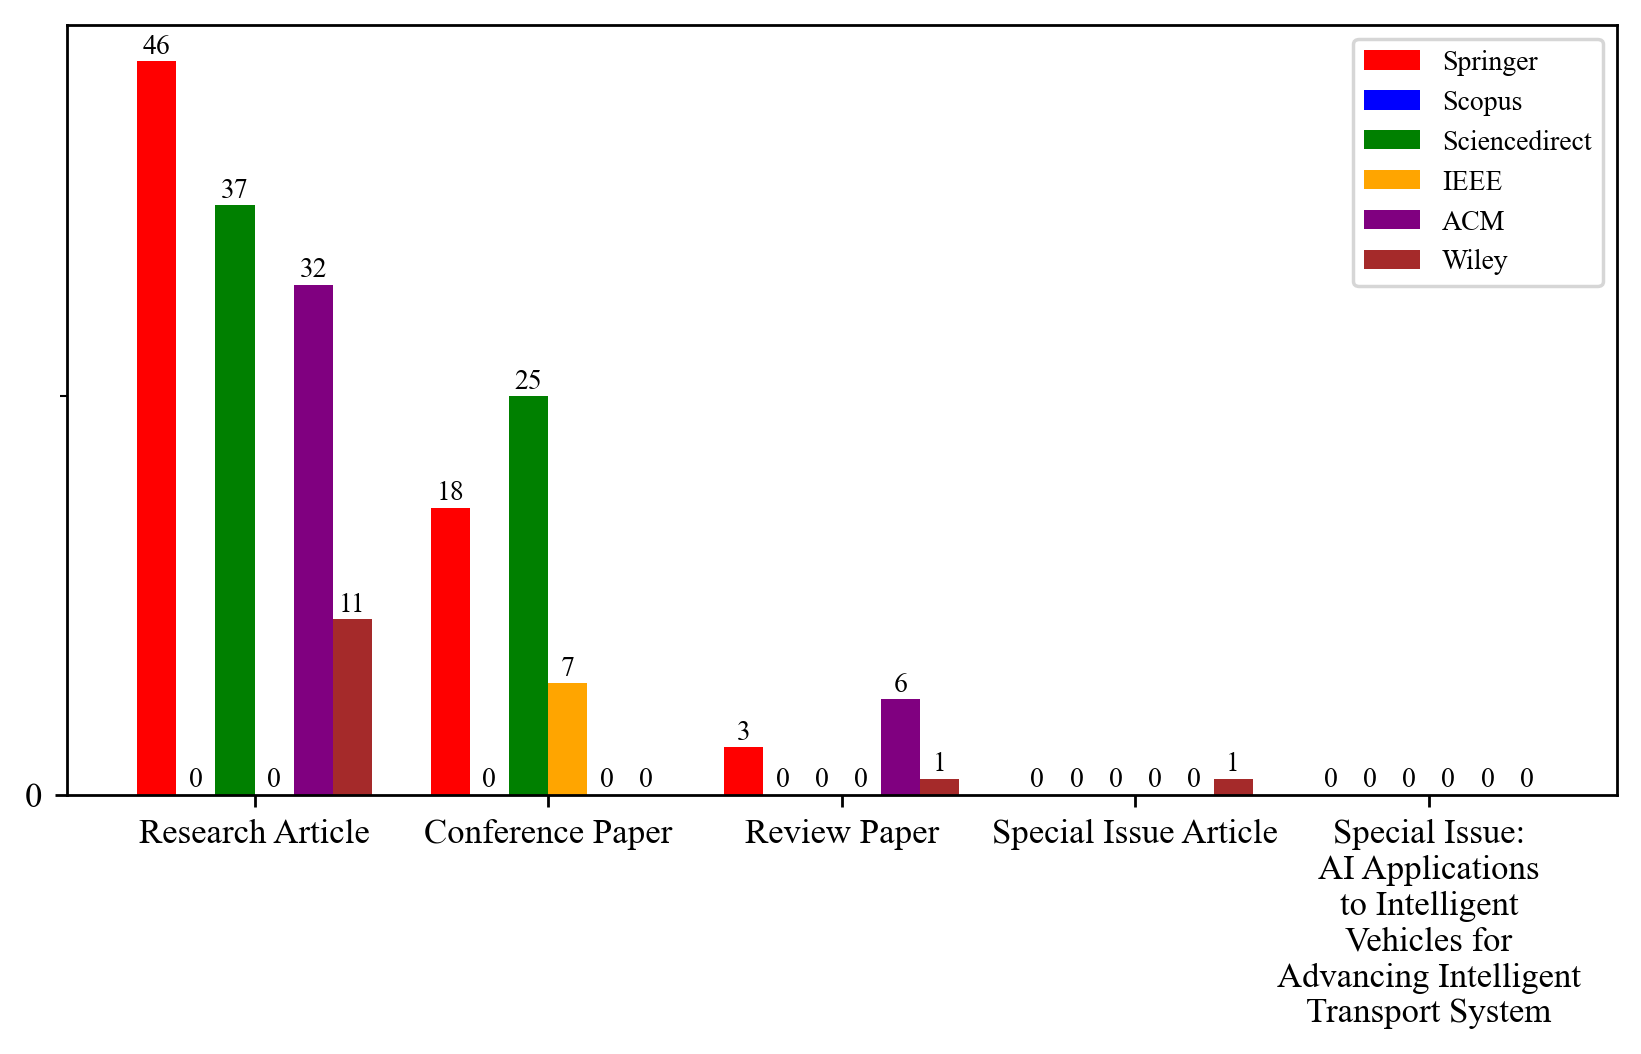

In [14]:
# Generate article type counts for each publisher
article_types = df.groupby('article_type').count()['title'].sort_values(ascending=False)
article_types = article_types.index[:5]
article_types = ['Research Article', 'Conference Paper', 'Review Paper',
       'Special Issue Article',
       'Special Issue:\nAI Applications\nto Intelligent\nVehicles for\nAdvancing Intelligent\nTransport System']

publishers = df['publisher'].unique()        # Use unique publishers from df
data_article_type_across_publishers = {}

# Iterate through each publisher and each article type
for publisher in publishers:
    publisher_counts = []
    for article_type in article_types:
        # Count the number of titles for each combination of article_type and publisher
        count = df.loc[(df['article_type'] == article_type) & (df['publisher'] == publisher), 'title'].count()
        publisher_counts.append(count)
    
    # Store the counts for the current publisher
    data_article_type_across_publishers[publisher] = publisher_counts


vals = [data_article_type_across_publishers[publisher] for publisher in publishers]  # Values for all publishers
fontsize['legend'] = 8

publishers = ['Springer', 'Scopus', 'Sciencedirect', 'IEEE', 'ACM', 'Wiley']
# Plot using subcategorybar function
subcategorybar(
    article_types,    # X-axis labels (article types)
    vals,             # Y-axis values (counts)
    colors=['red', 'blue', 'green', 'orange', 'purple', 'brown'],  # Colors for each publisher
    labels=publishers,  # Publisher names as labels
    width=0.8,        # Bar width
    major=100,         # Major tick interval
    minor=25,          # Minor tick interval
    bar=True,         # Plot bars
    spines=True,       # Show axis spines,
    show_text=True,
    fontsize=fontsize,
    rotation=0
)


#### Publication over the year (2019-2024)

L: Springer | colors : #808080 | 0 | [2, 7, 7, 10, 21, 20]
L: Scopus | colors : k | 1 | [0, 0, 0, 2, 2, 1]
L: Sciencedirect | colors : r | 2 | [6, 4, 9, 14, 15, 14]
L: IEEE | colors : y | 3 | [2, 1, 2, 1, 0, 1]
L: ACM | colors : m | 4 | [5, 3, 3, 13, 9, 5]
L: Wiley | colors : b | 5 | [0, 3, 2, 5, 1, 3]


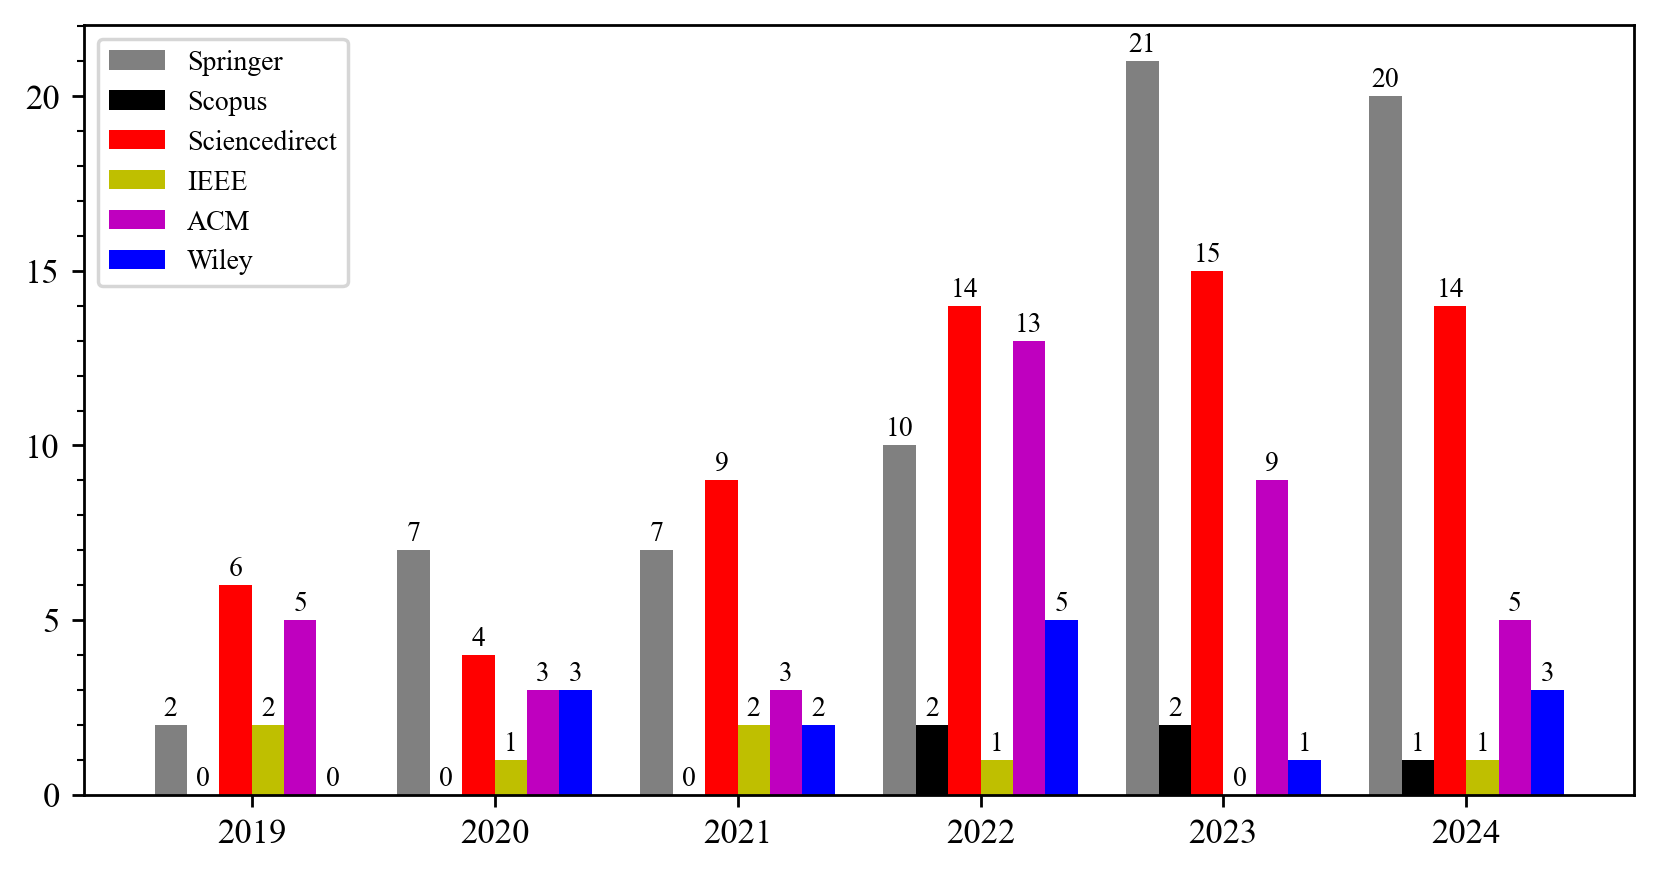

In [15]:
years = [i for i in range(2019, 2025)]
'''
df = {
    2004 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
    2005 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
                                        .
                                        .
                                        .
                                        .
    2024 : ['Springer', 'Sciencedirect', 'Scopus', 'IEEE', 'ACM', 'Wiley'],
}
'''
 
data_publication_over_year = {}
for publisher in relevant_articles.publisher.unique():
    data_publication_over_year[publisher] = []
    for year in years:
        temp = relevant_articles.loc[
            (relevant_articles['year'] == year) & (relevant_articles['publisher'] == publisher)]['title'].count()

        data_publication_over_year[publisher].append(temp)

publishers = ['Springer', 'Scopus', 'Sciencedirect', 'IEEE', 'ACM', 'Wiley']
subcategorybar(
    years, 
    [data_publication_over_year[publisher] for publisher in data_publication_over_year.keys()], 
    colors, 
    publishers,
    width=0.8, 
    major=5, 
    minor=1, 
    bar=True, 
    spines=True,
    rotation=0,
    show_text=True
)

#### Properties in articles

In [16]:
properties = [
    'data aggregation',
    'sleep/wake-up',  # Added comma here
    'collision avoidance',
    'multi-hop',
    'multi-path',
    'ch selection',
    'discovery neighbour',
    'cluster formation',
    'fault tolerance',
    'energy consumption',
    'energy balancing'
]
temp = ''
for property in properties:
    temp += property + ', '

print(temp)

data aggregation, sleep/wake-up, collision avoidance, multi-hop, multi-path, ch selection, discovery neighbour, cluster formation, fault tolerance, energy consumption, energy balancing, 


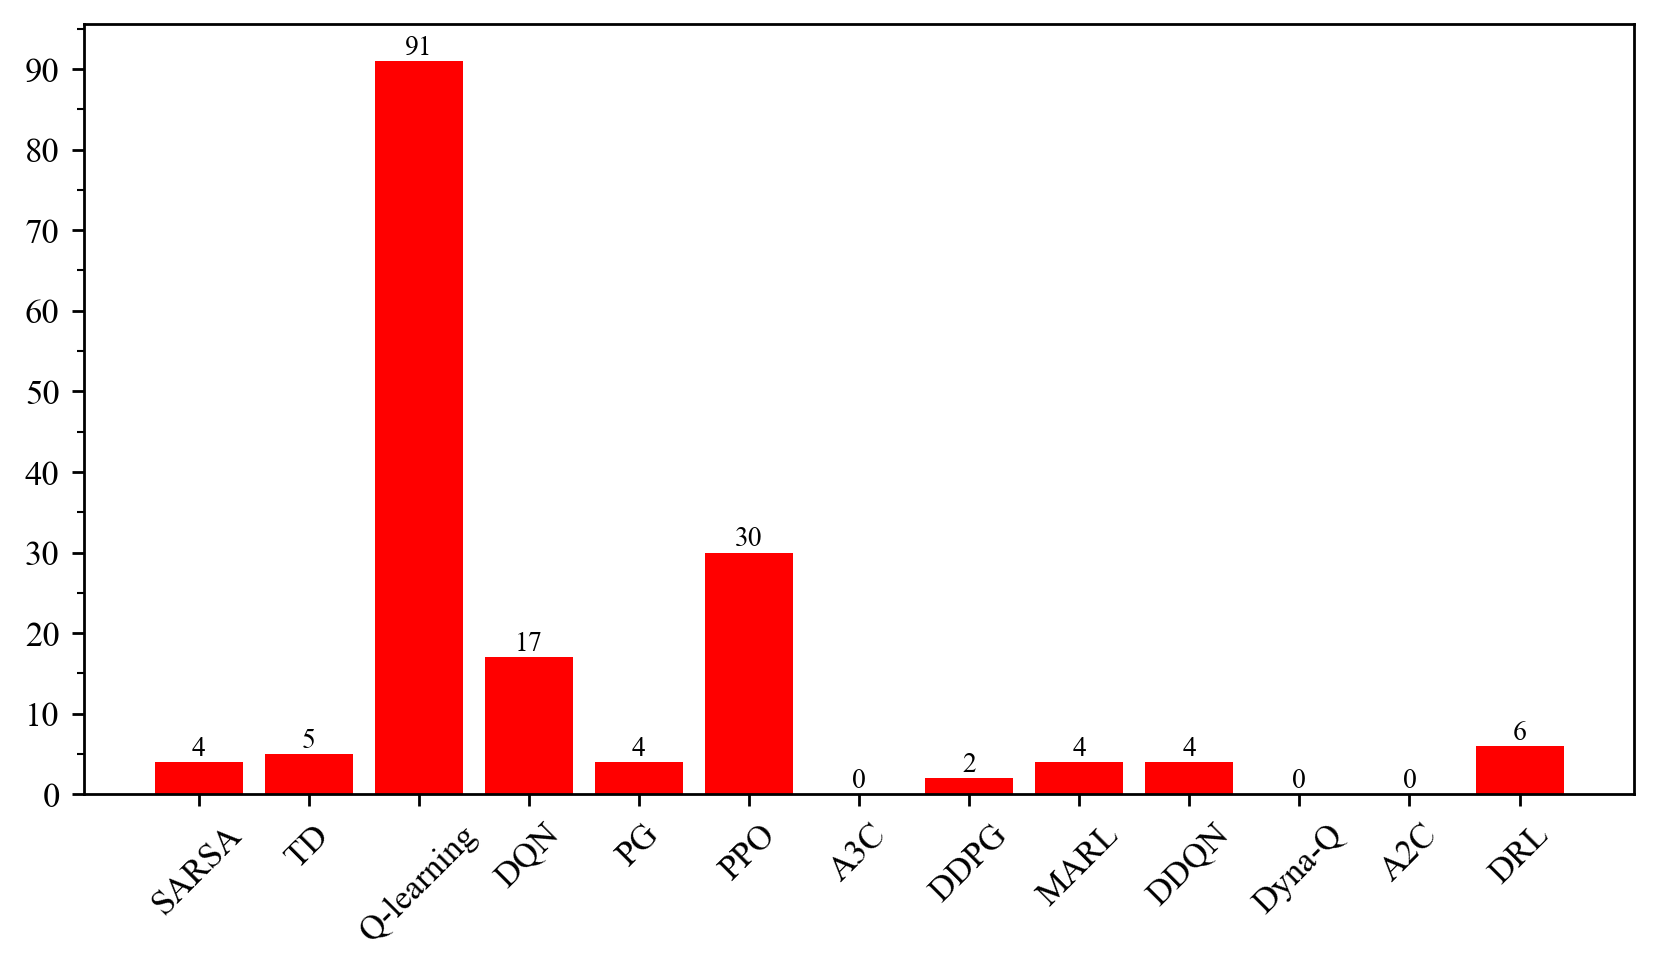

In [17]:
properties = [
    'SARSA', 'TD','Q-learning', 'DQN', 'PG', 'PPO', 'A3C', 'DDPG', 
    'MARL', 'DDQN', 'Dyna-Q', 'A2C', 'DRL'
]
property_frequency = {prop: 0 for prop in properties}
df_combined_text = (
    df['keyword'].fillna('').str.lower() + ' ' +
    df['title'].fillna('').str.lower() + ' ' +
    df['abstract'].fillna('').str.lower()
)
for prop in properties:
    property_frequency[prop] = df_combined_text.str.contains(prop, case=False).sum()

# Convert the dictionary into a pandas DataFrame for easier plotting
property_df = pd.DataFrame(list(property_frequency.items()), columns=['Property', 'Frequency'])

fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    property_df['Property'], 
    property_df['Frequency'], 
    width=0.8, 
    color='r'
)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=fontsize['text']  # Font size
    )
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(range(0, len(property_df['Property'])), property_df['Property'], rotation=45)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.spines[['right', 'top']].set_visible(True)



plt.show()

#### Properties group in articles

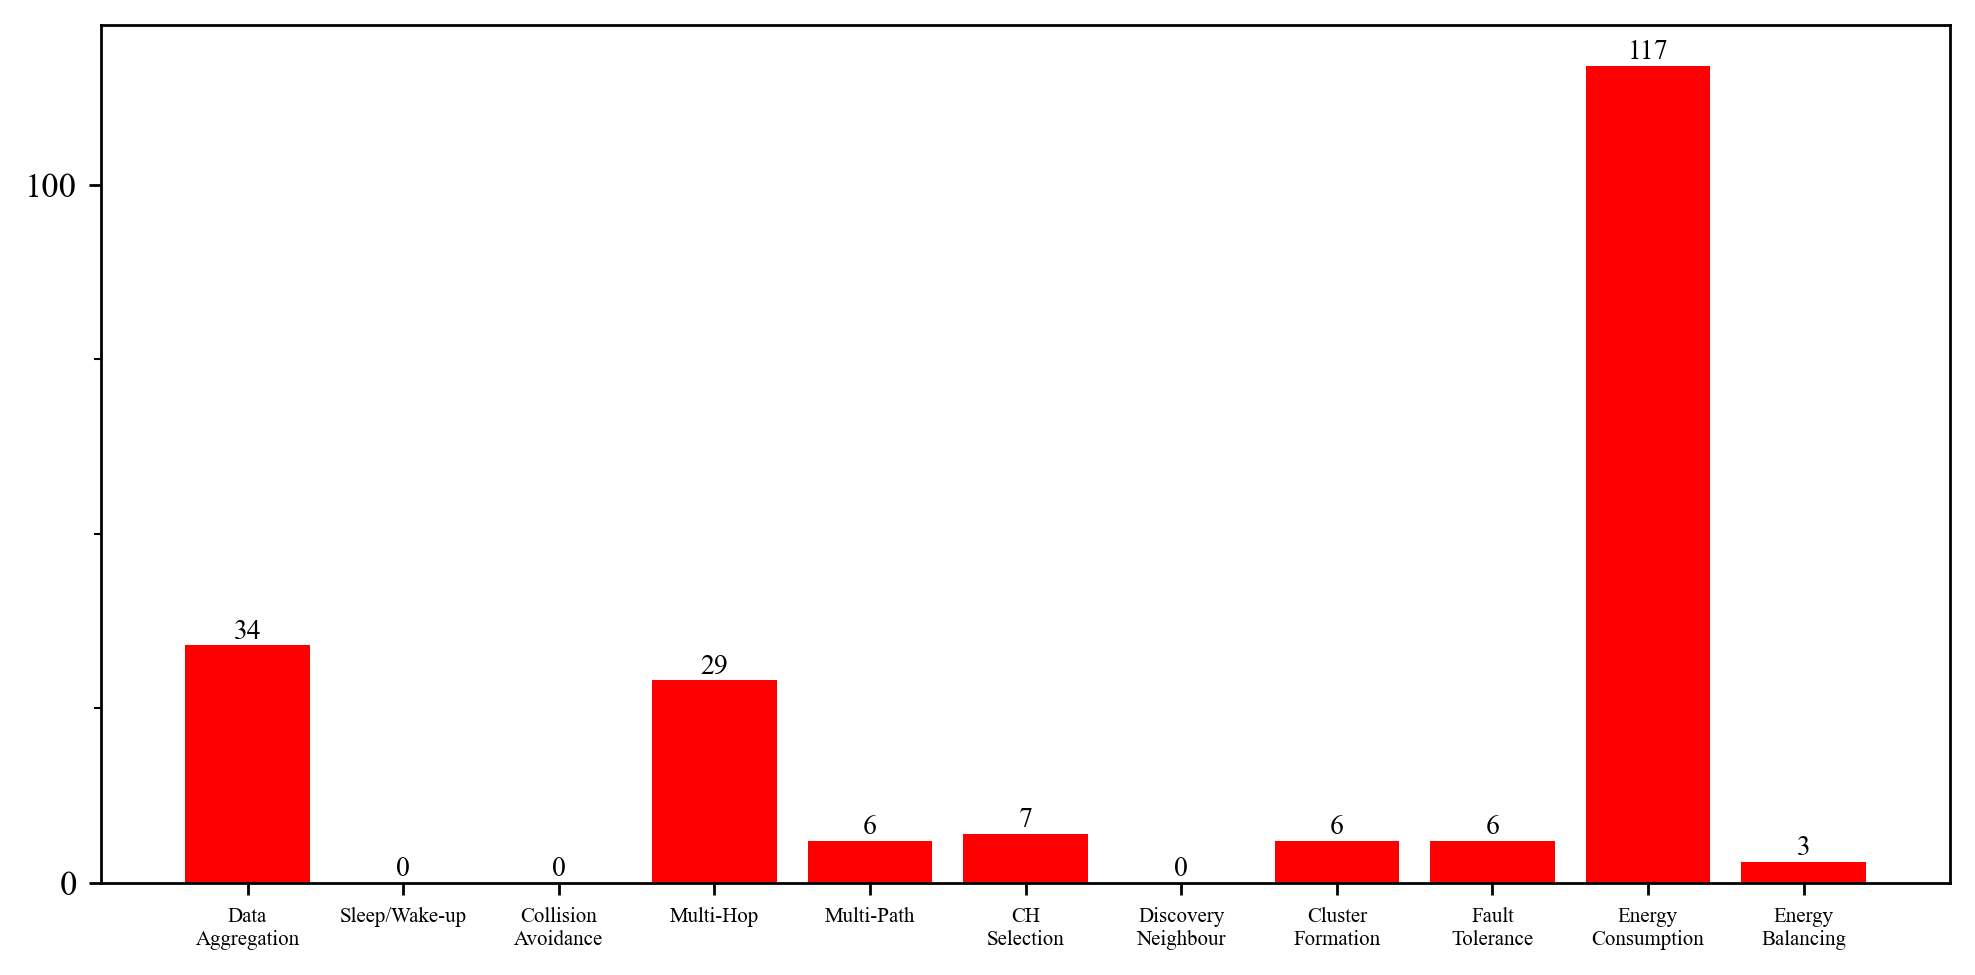

In [18]:
properties = [
    'data aggregation',
    'sleep/wake-up',  # Added comma here
    'collision avoidance',
    'multi-hop',
    'multi-path',
    'ch selection',
    'discovery neighbour',
    'cluster formation',
    'fault tolerance',
    'energy consumption',
    'energy balancing'
]

# Initialize the frequency dictionary
property_frequency = {prop: 0 for prop in properties}

# Combine the text fields into one column for searching
df_combined_text = (
    df['keyword'].fillna('').str.lower() + ' ' +
    df['title'].fillna('').str.lower() + ' ' +
    df['abstract'].fillna('').str.lower()
)

# Calculate the frequency of each property in the combined text
for prop in properties:
    property_frequency[prop] = df_combined_text.str.contains(prop, case=False).sum()

# Convert the dictionary into a DataFrame for easier plotting
property_df = pd.DataFrame(list(property_frequency.items()), columns=['Property', 'Frequency'])

# Prepare X-axis values
_X = np.arange(len(property_df['Property']))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    property_df['Frequency'], 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )
labels = [
    'Data\nAggregation',
    'Sleep/Wake-up',  # Added comma here
    'Collision\nAvoidance',
    'Multi-Hop',
    'Multi-Path',
    'CH\nSelection',
    'Discovery\nNeighbour',
    'Cluster\nFormation',
    'Fault\nTolerance',
    'Energy\nConsumption',
    'Energy\nBalancing'
]
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.spines[['right', 'top']].set_visible(True)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Highest publisher count

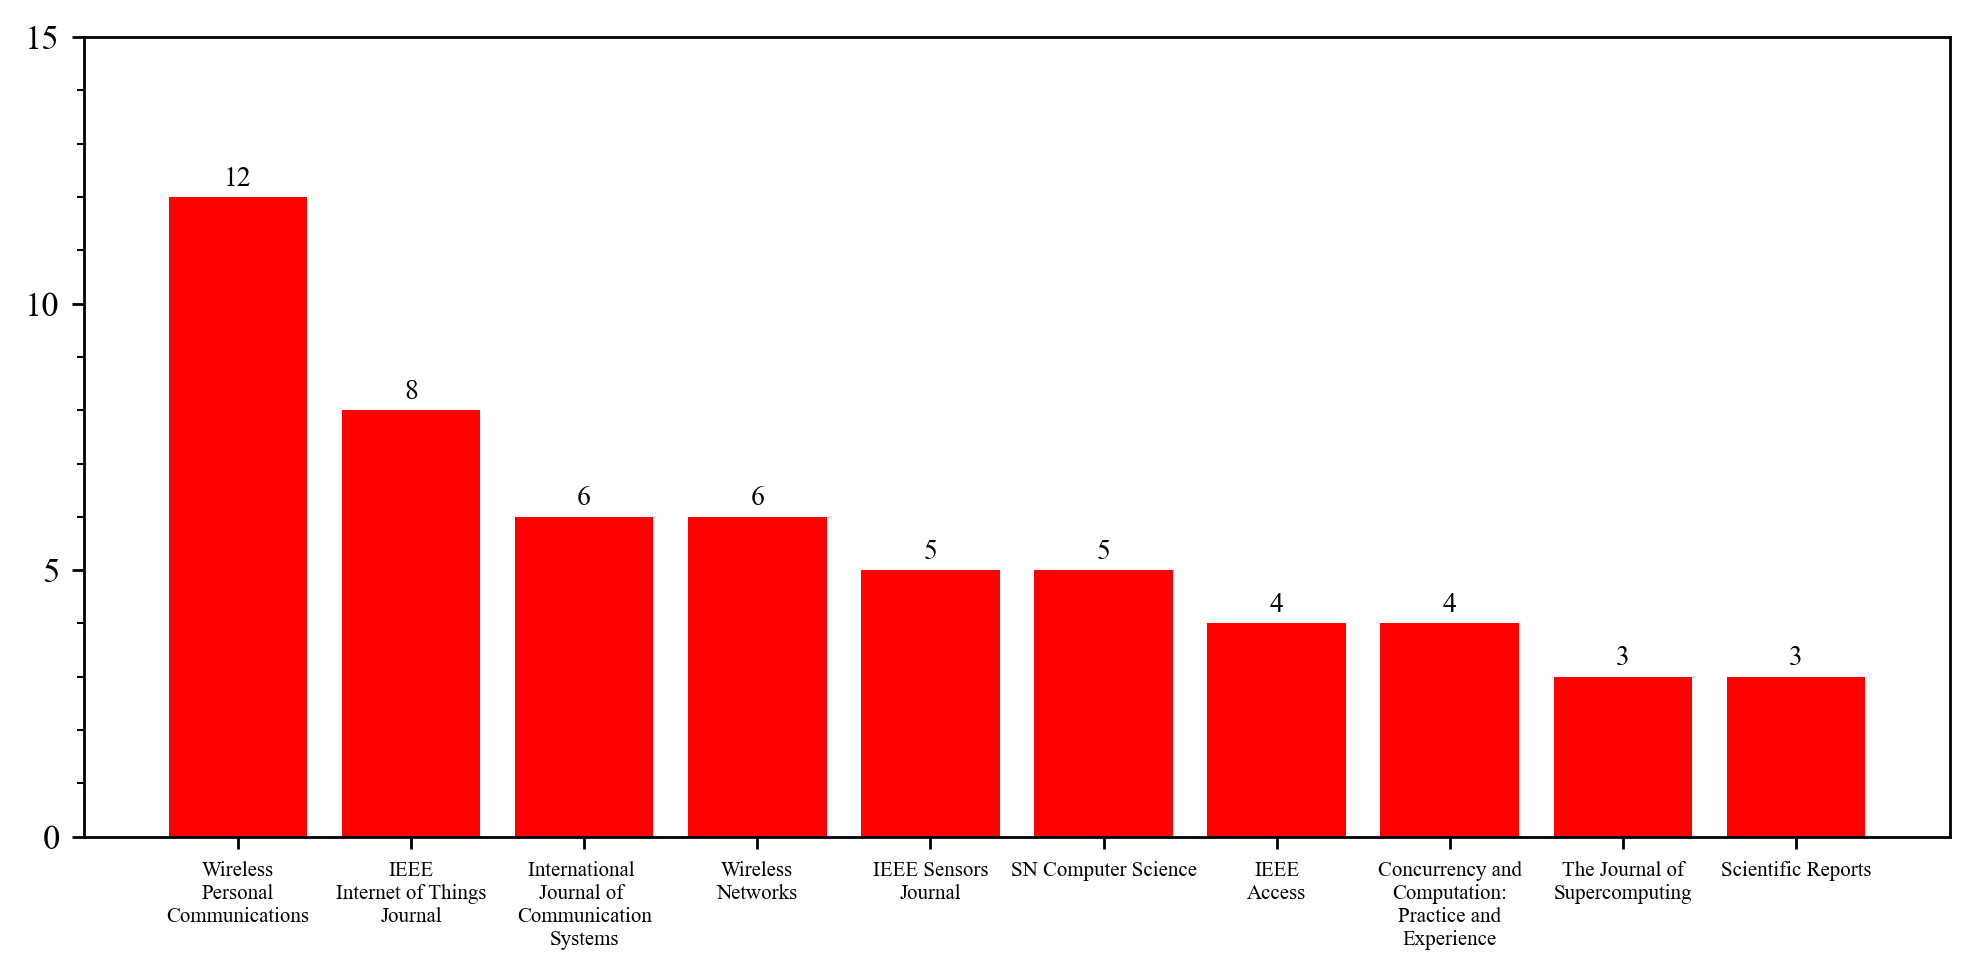

In [19]:
Y = relevant_articles.groupby('publication_title').count()['title'].sort_values(ascending=False).to_list()[:10]
X = relevant_articles.groupby('publication_title').count()['title'].sort_values(ascending=False).index.to_list()[:10]


# Prepare X-axis values
_X = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    Y, 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )
labels = ['Wireless\nPersonal\nCommunications',
 'IEEE\nInternet of Things\nJournal',
 'International \nJournal of \nCommunication\nSystems',
 'Wireless\nNetworks',
 'IEEE Sensors\nJournal',
 'SN Computer Science',
 'IEEE\nAccess',
 'Concurrency and\nComputation:\nPractice and\nExperience',
 'The Journal of\nSupercomputing',
 'Scientific Reports']
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.spines[['right', 'top']].set_visible(True)

ax.set_ylim([0,15])
# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Highest publisher citation

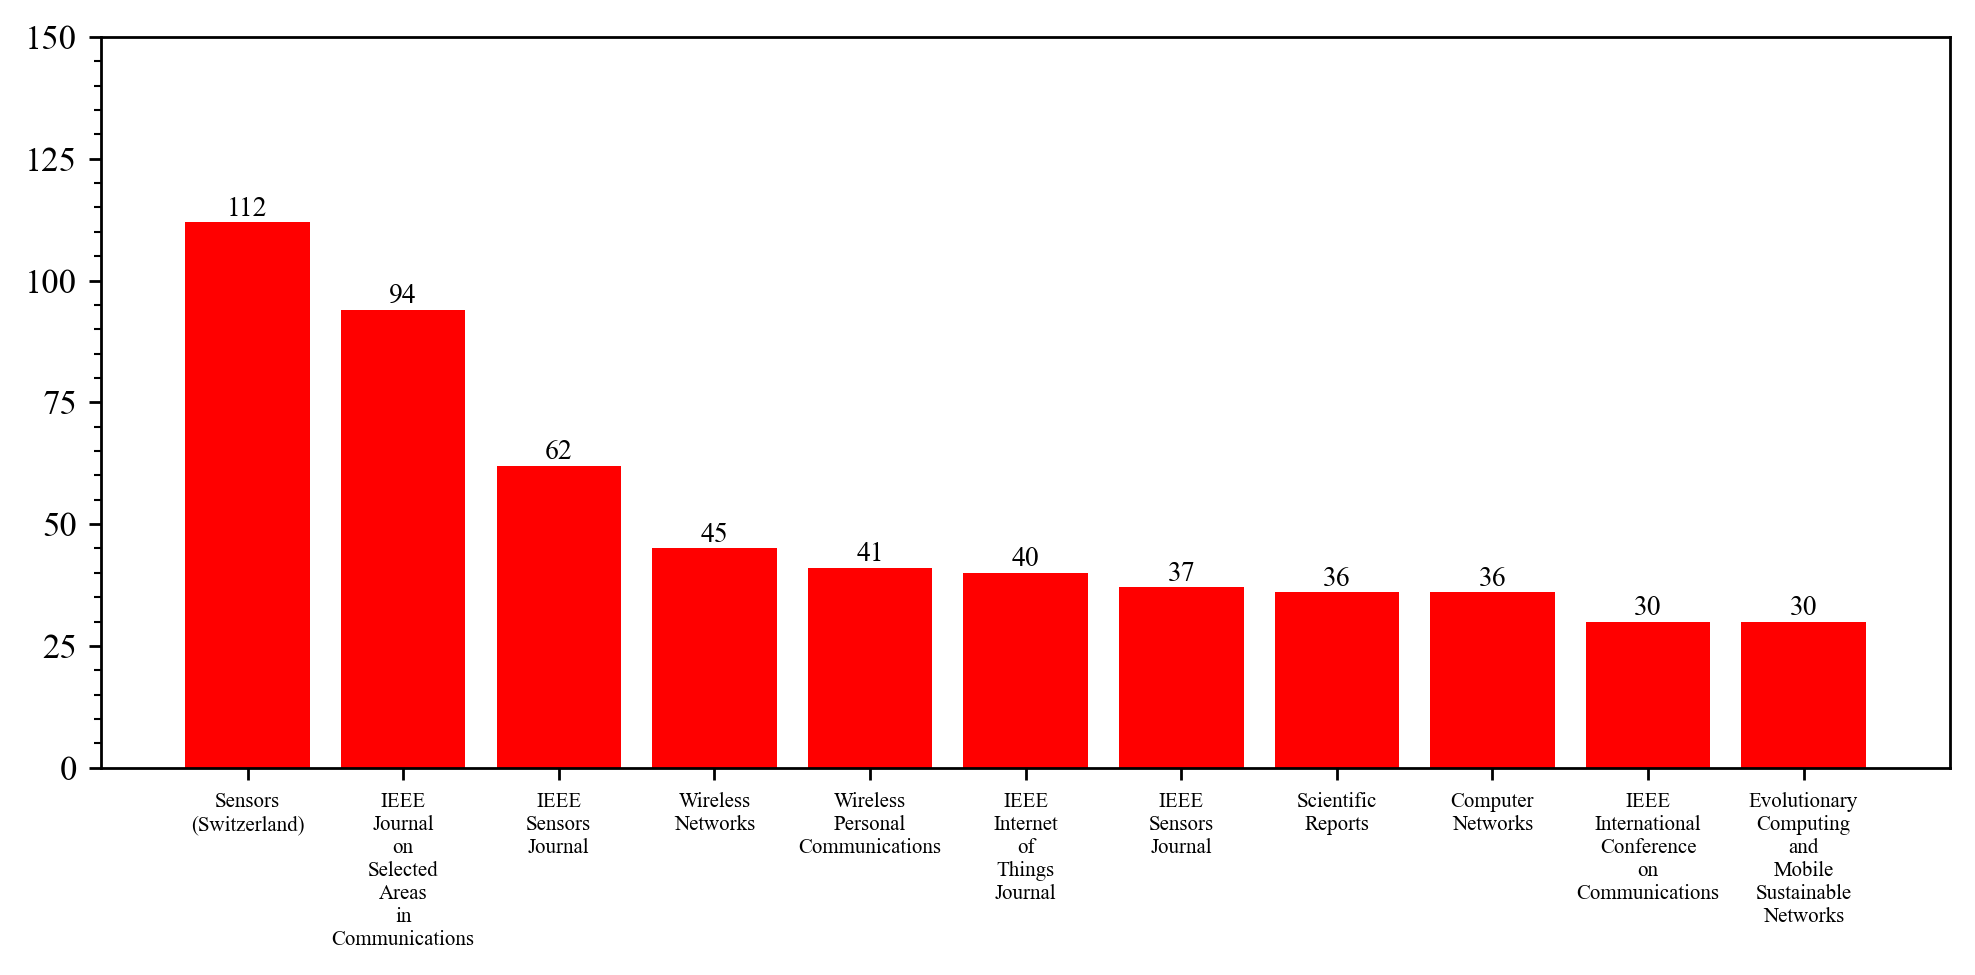

In [20]:
df_publication_title_over_number_of_citation = df.drop(columns=['title', 'link', 'article_type', 
       'keyword', 'abstract', 'publish_date', 'authors',
       'affiliations', 'number_of_affiliations', 'countries',
       'number_of_countries', 'number_of_found_property_group',
       'number_of_found_properties'])
df_publication_title_over_number_of_citation = df_publication_title_over_number_of_citation.groupby(['publication_title', 'number_of_citation']).sum().sort_values(ascending=False, by='number_of_citation')

N_PUBLICATION_TITLE = 12
Y = df_publication_title_over_number_of_citation.index.get_level_values('publication_title').to_list()[:N_PUBLICATION_TITLE]
X = df_publication_title_over_number_of_citation.index.get_level_values('number_of_citation').to_list()[:N_PUBLICATION_TITLE]
temp1 = Y[0]
temp2 = Y[1]
X[0] = 66 + 46
X[1] = 94
X.pop(3)
Y.pop(3)
Y[0] = temp2
Y[1] = temp1


# Prepare X-axis values
_X = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    X, 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )

labels = [i.replace(' ', '\n') for i in Y]
# Correctly set X-ticks with rotation and labels
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.spines[['right', 'top']].set_visible(True)

ax.set_ylim([0, 150])
# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:
df['Parameter'] = df.apply(find_parameters, informations=parameters, axis=1)
df['Parameter'] = df['Parameter'].apply(lambda x: '\n'.join(f"{i + 1}. {param}" for i, param in enumerate(x)))

df['Algoritma'] = df.apply(find_parameters, axis=1, informations=algorithms)
df['Algoritma'] = df['Algoritma'].apply(lambda x: '\n'.join(f"{i + 1}. {param}" for i, param in enumerate(x)))

df['Metode'] = df.apply(find_parameters, axis=1,  informations=methods)
df['Metode'] = df['Metode'].apply(lambda x: '\n'.join(f"{i + 1}. {param}" for i, param in enumerate(x)))

df['formatted_authors'] = df['authors'].apply(
    lambda x: f"{x.split(',')[0].split()[-1]} et al."
)

final_review = df[['title', 'formatted_authors', 'number_of_citation','Parameter', 'Algoritma', 'Metode']]
final_review = final_review.loc[df['Parameter'] != '']
final_review = final_review.loc[df['Algoritma'] != '']
final_review = final_review.loc[df['Metode'] != '']
final_review = final_review.reset_index(drop=True)
final_review.to_excel('Parameter_Method_Algorithm.xlsx', index=False)

# Create a formatted string for the new column


### Purpose

C:\Users\user\AppData\Local\Temp\ipykernel_16536\1380501384.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  property_frequency[prop] = df_combined_text.str.contains(prop, case=False).sum()


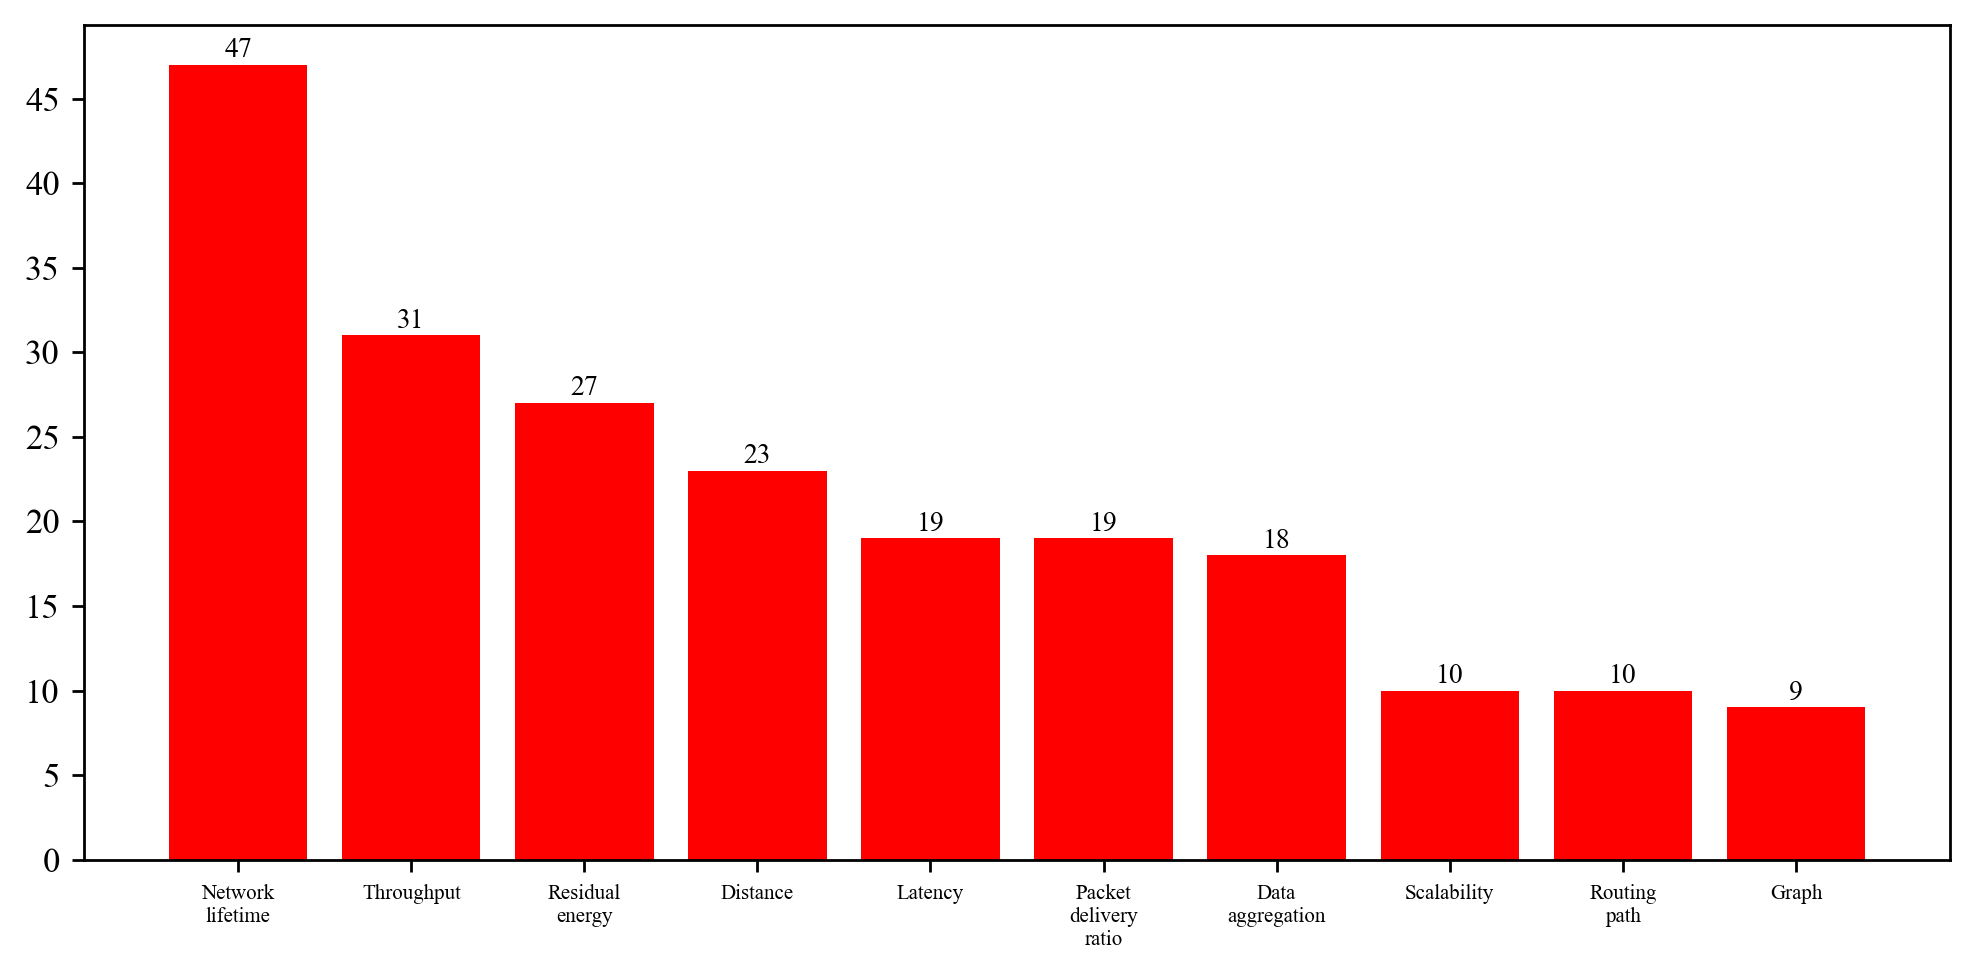

In [25]:
parameters = [
    "Number of hops", "Distance", "Residual energy", "Link strength", "Node status", 
    "Coverage", "Distance to Cluster Head (CH)", "Cluster formation", "Number of nodes", 
    "Cluster Head (CH) selection", "Packet transmission status", "Network congestion", 
    "Routing path", "Scheduling parameter", "Data traffic", "Network traffic", 
    "Transmission power control", "Data aggregation", "Latency", "Node mobility", 
    "Load balancing", "Energy consumption rate", "Transmission delay", "Node failure rate", 
    "Packet delivery ratio", "Duty cycle", "Path loss", "Channel state information", 
    "Signal-to-noise ratio (SNR)", "Interference level", "Transmission retries", 
    "Traffic priority", "Packet loss rate", "Signal strength", "Data rate", 
    "Bandwidth usage", "Routing path stability", "Node degree", "Cluster Head (CH) election frequency", 
    "Node density", "Network size", "Topology changes", "Traffic load balancing", 
    "Throughput", "Jitter", "Packet delay variation", "Authentication status", 
    "Encryption level", "Security overhead", "Memory usage", "CPU usage", "Storage capacity", 
    "Duty cycle management", "Active/sleep scheduling", "Temperature", "Humidity", 
    "Physical obstacles", "Terrain", "Node placement accuracy", "Coverage area", 
    "Redundancy level", "Load balancing efficiency", "Channel allocation", 
    "Multi-path routing capability", "Scalability", "Fairness in resource allocation", 
    "Routing overhead", "Routing latency", "Route discovery time", "Route maintenance cost", 
    "Quality of links", "Mobility support", "Energy efficiency metrics", "Reliability metrics", 
    "Adaptive algorithms", "Self-healing capability", "Fault tolerance", "Network lifetime", 
    "Convergence time", "Data redundancy", "Network synchronization", "Control overhead", 
    "Routing metric", "Routing decision accuracy", "Route stability", 
    "Hop-by-hop energy consumption", "Global energy balance", "Energy-aware routing", 
    "Threshold energy level", "Network topology diversity", "Local information availability", 
    "Geographic information", "Position information", "Location-based routing", 
    "Directionality of links", "Cross-layer optimization", "Learning rate in reinforcement learning", 
    "Exploration vs exploitation balance", "Reward function design", "Policy convergence", 
    "Neighbor node information", "Beacon interval", "Data compression rate", 
    "Energy harvesting rate", "Sleep mode duration", "Energy per bit", 
    "Data packet size", "Network throughput", "Route optimality", "Graph",
    "Energy distribution among nodes", "Link stability", "Routing table size", 
    "Data prioritization", "Channel utilization", "Synchronization accuracy", 
    "Environmental sensing accuracy", "Data freshness", "Backup route availability", 
    "Route diversity", "Packet queuing delay", "Buffer occupancy", 
    "Energy consumption per operation", "Cluster size", "Beaconing rate", 
    "Routing protocol overhead", "Data transmission frequency", "Energy consumption variance", 
    "Node collaboration level", "Topology control mechanism", "Energy harvesting efficiency", 
    "Network adaptability", "Resource utilization efficiency", "Routing path optimality", 
    "Energy redistribution mechanisms", "Dynamic routing adaptability", "Fault detection rate", 
    "Recovery time from faults", "Energy-efficient wake-up scheduling", "Data aggregation efficiency", 
    "Traffic prediction accuracy", "Routing decision latency", "Network scalability factor", 
    "Energy-aware neighbor selection", "Adaptive transmission power", 
    "Data forwarding strategy", "Energy-aware MAC protocol", "Data routing flexibility", 
    "Energy harvesting capability", "Dynamic clustering", "Energy threshold adaptation", 
    "Routing path robustness", "Energy-efficient data dissemination", "QoS-aware routing", 
    "Energy-efficient neighbor discovery"
]
property_frequency = {prop: 0 for prop in parameters}

# Combine the text fields into one column for searching
df_combined_text = (
    final_review['Parameter'].fillna('').str.lower() 
)

# Calculate the frequency of each property in the combined text
for prop in parameters:
    property_frequency[prop] = df_combined_text.str.contains(prop, case=False).sum()

# Convert the dictionary into a DataFrame for easier plotting
property_df = pd.DataFrame(list(property_frequency.items()), columns=['Property', 'Frequency'])
property_df = property_df.sort_values(by='Frequency', ascending=False)
property_df = property_df[:10]

# Prepare X-axis values
_X = np.arange(len(property_df['Property']))

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bars = ax.bar(
    _X, 
    property_df['Frequency'], 
    width=0.8, 
    color='r'
)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        yval + 0.1,  # Y position (slightly above the bar)
        round(yval, 2),  # The value of the bar, rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8  # Font size
    )

# Correctly set X-ticks with rotation and labels
labels = [param.replace(' ', '\n') for param in property_df['Property']]
plt.xticks(_X, labels, rotation=0, ha='center', fontsize=6)

# Customize the Y-axis
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.spines[['right', 'top']].set_visible(True)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()